# Goal Definition

# Importing Essential Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import auc
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_classification, make_gaussian_quantiles
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox
from scipy.stats import yeojohnson
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.losses import binary_crossentropy
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Input
# from tensorflow.keras.layers import Activation
# from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



# Loading Dataset

In [6]:
# Loading dataset

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Dataset before encoding will be assigned the variable (df_be)

In [7]:
#  Reading Dataset and displaying first 5 rows
df_be = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Project/health_dataset.csv')
df_be.head(5)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

# Data Preprocessing

Dropping the unnecessary columns i.e Patient ID

In [8]:
df_be.drop(['id'], axis=1, inplace=True)

In [9]:
gender_counts = df_be['gender'].value_counts()
total_entries = len(df_be)
gender_percentages = (gender_counts / total_entries) * 100

print("Gender Percentages:")
print(gender_percentages)

Gender Percentages:
gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: count, dtype: float64


In [10]:
gender_counts

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [11]:
df_be[df_be['gender']== 'Other']

gender   age  hypertension  heart_disease ever_married work_type  \
3116  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0

We can see that the there is only one case of gender identified as (other), and it is  not labeled as stroke, in this case this instance is insignificant and best to be dropped to avoid having a designated category only for (other) when perfoming encoding

In [12]:
df_be.drop(df_be[df_be['gender']== 'Other'].index,inplace= True)
df_be.shape

(5109, 11)

In [13]:
df_be.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  5109.000000   5109.000000    5109.000000        5109.000000   
mean     43.229986      0.097475       0.054022         106.140399   
std      22.613575      0.296633       0.226084          45.285004   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.240000   
50%      45.000000      0.000000       0.000000          91.880000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.000000         271.740000   

              bmi       stroke  
count  4908.00000  5109.000000  
mean     28.89456     0.048738  
std       7.85432     0.215340  
min      10.30000     0.000000  
25%      23.50000     0.000000  
50%      28.10000     0.000000  
75%      33.10000     0.000000  
max      97.60000     1.000000

Exploring missing values

In [14]:
df_be.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
ratio_of_missing_data =(df_be["bmi"].isnull().sum() / df_be.shape[0]) * 100
print("Ratio of Missing Data",(ratio_of_missing_data),'%')


Ratio of Missing Data 3.9342337052260716 %


Missing bmi values represent almost 4% of the dataset, so based on the data size 5000+, we will not drop missing values in the bmi column

## Dealing with Missing Data, using Median

In [16]:
# # drop the missing values
# df_be.dropna(subset=['bmi'], inplace=True)

In [17]:
median_bmi =df_be['bmi'].median()
df_be['bmi'].fillna(median_bmi, inplace =True)

Checking data frame to confirm abscence of null data

In [18]:
df_be.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Dicovering data counts and distributions

In [19]:
df_be['stroke'].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

The distribution analysis of the two classes above indicate that this dataset is imbalanced as only 249 cases out of 5000+ samples are labelled as stroke. Therefore, we will need to apply techniques to balance the dataset prior to model development.

In [20]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'smoking_status', 'stroke']
numerical_features = [ 'age', 'avg_glucose_level', 'bmi']

## Exploratory Data Analysis

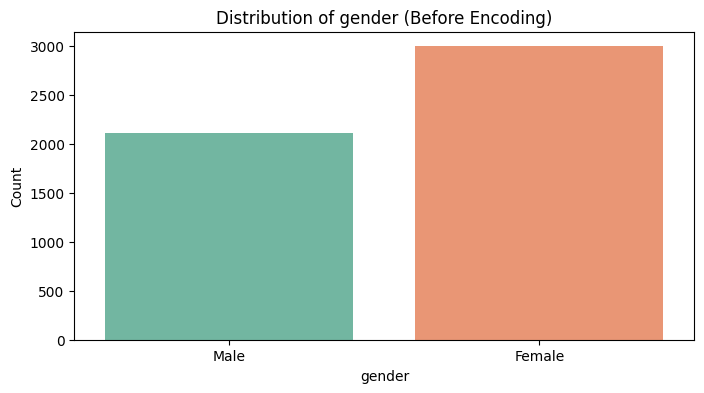

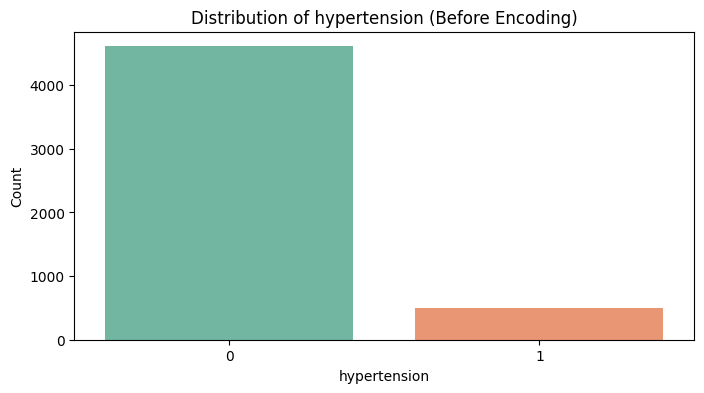

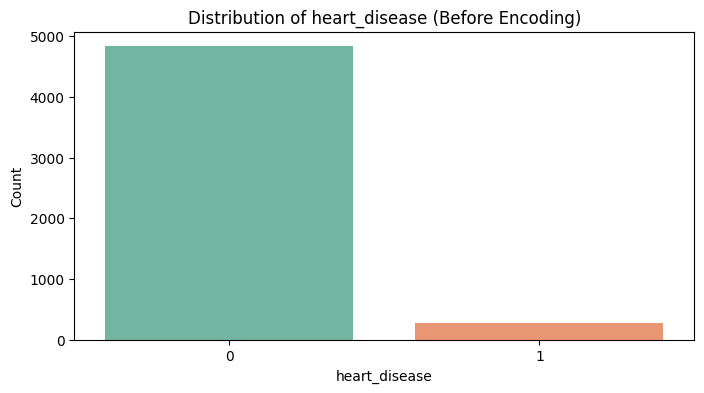

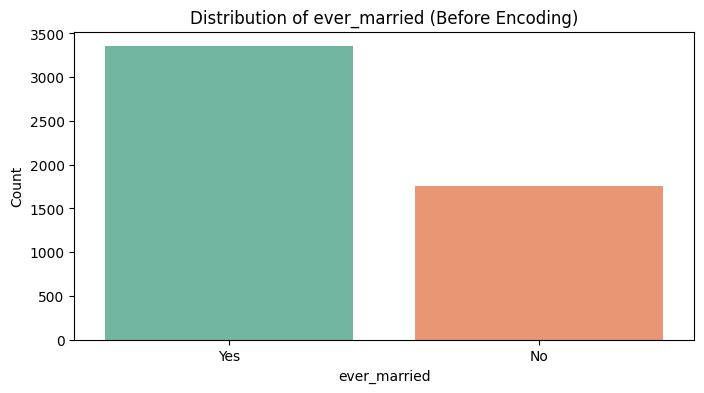

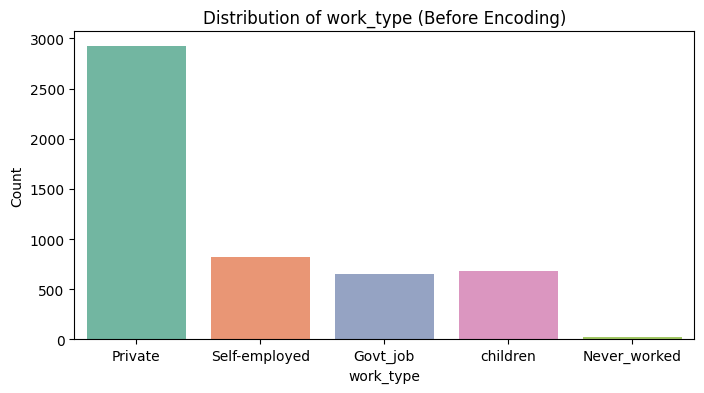

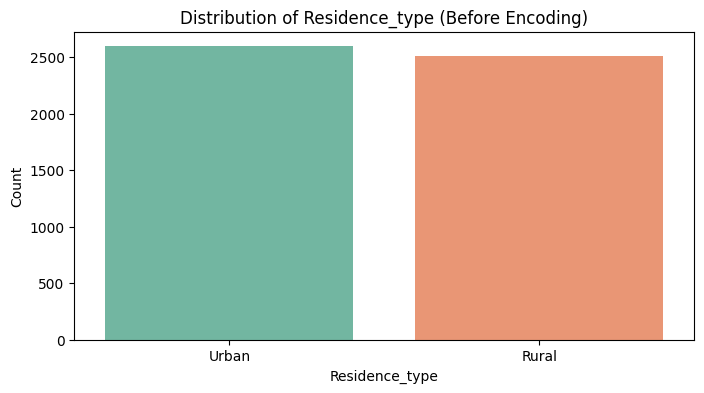

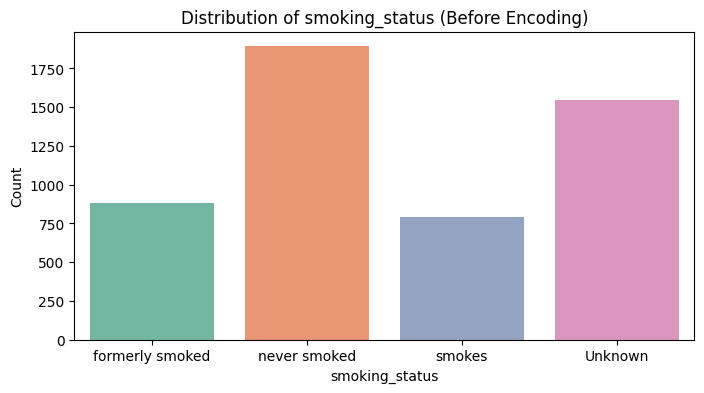

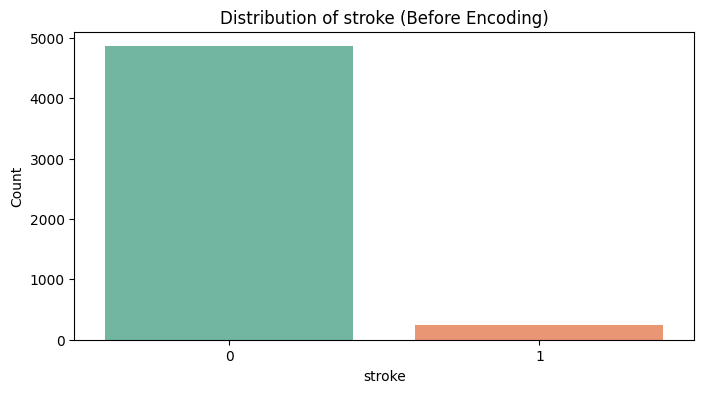

In [21]:
for feature in categorical_features:
   plt.figure(figsize=(8, 4))
   sns.countplot(data=df_be, x=feature, palette='Set2')
   plt.title(f'Distribution of {feature} (Before Encoding)')
   plt.xlabel(feature)
   plt.ylabel('Count')

   plt.show()

Distribution of categorical features using pie chart and percentage of occurrences

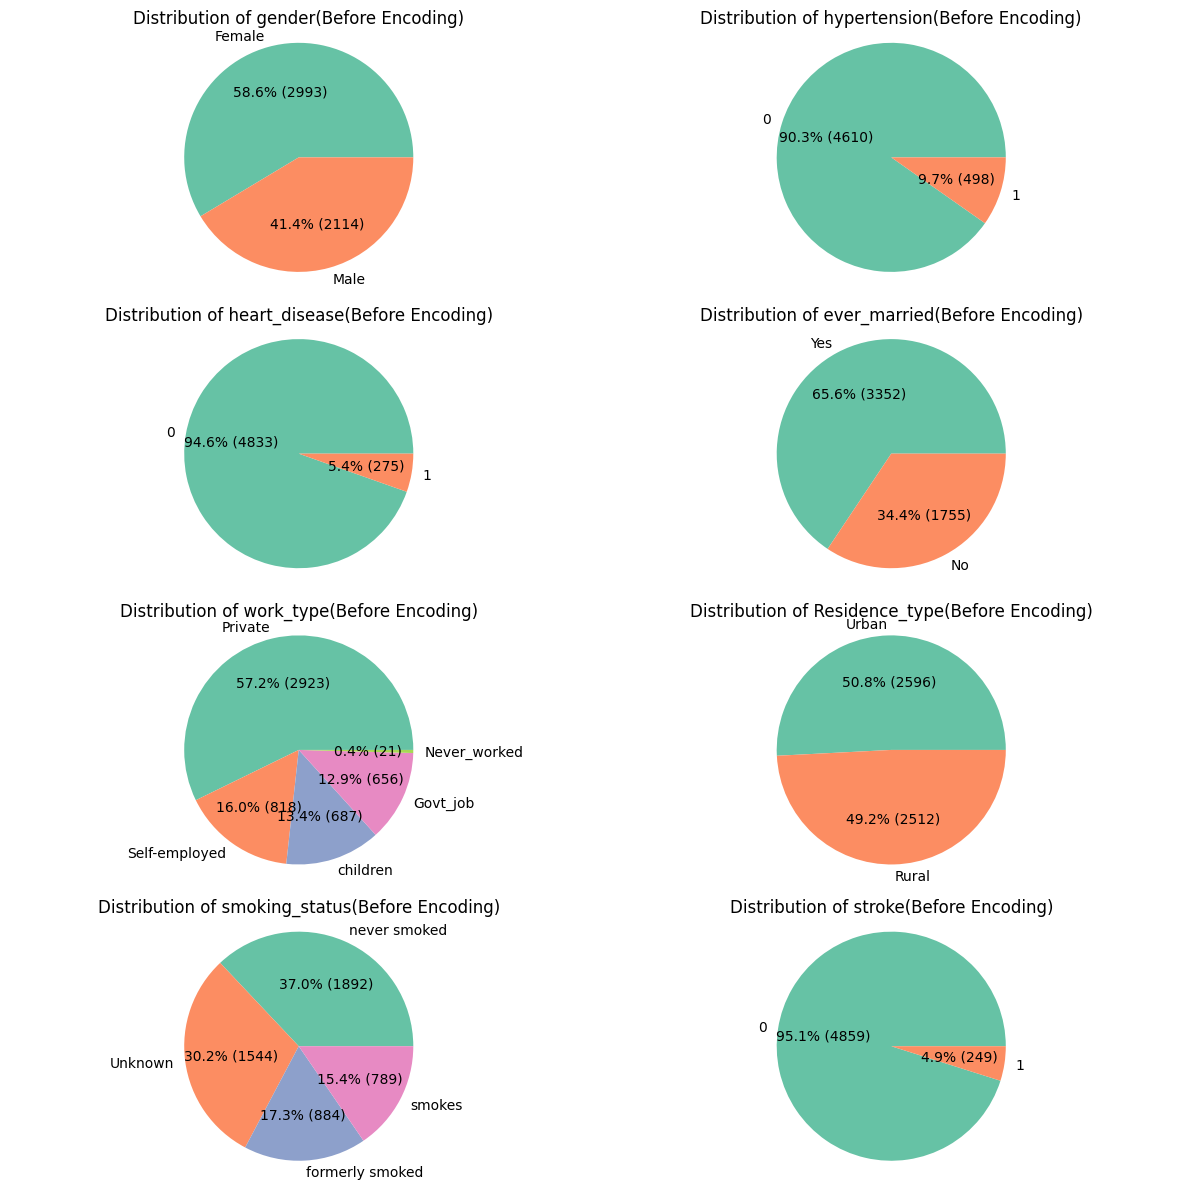

In [22]:
num_rows = 4
num_cols = 2
total_plots = num_rows * num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for idx, feature in enumerate(categorical_features[:total_plots]):
    row = idx // num_cols
    col = idx % num_cols

    category_counts = df_be[feature].value_counts()

    axes[row, col].pie(category_counts, labels=category_counts.index, autopct=lambda pct: f"{pct:.1f}% ({int(pct * sum(category_counts)/100)})",colors=sns.color_palette('Set2', len(category_counts)))
    axes[row, col].set_title(f'Distribution of {feature}(Before Encoding)')
    axes[row, col].axis('equal')

plt.tight_layout()
plt.show()


Distribution of features - numerical features

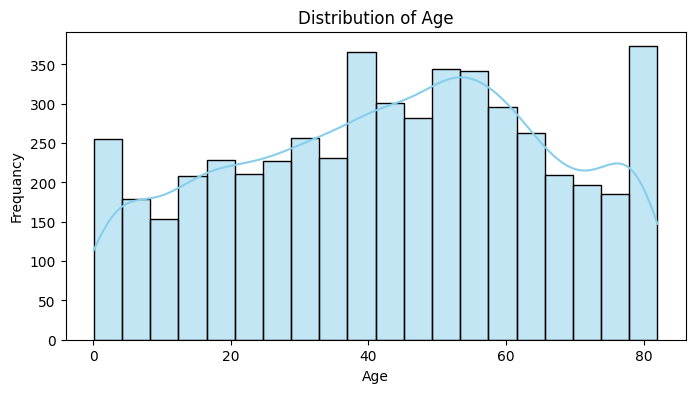

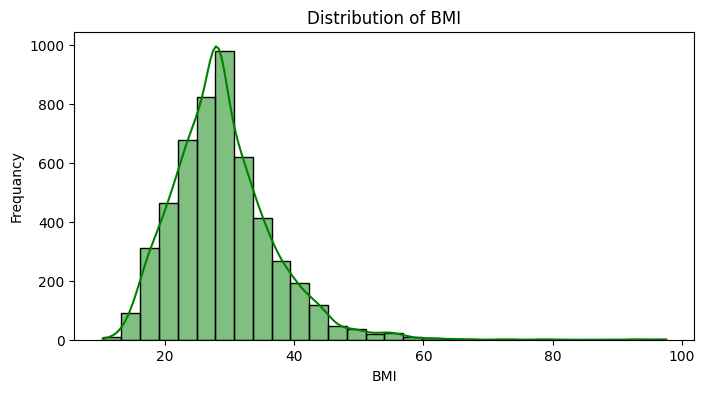

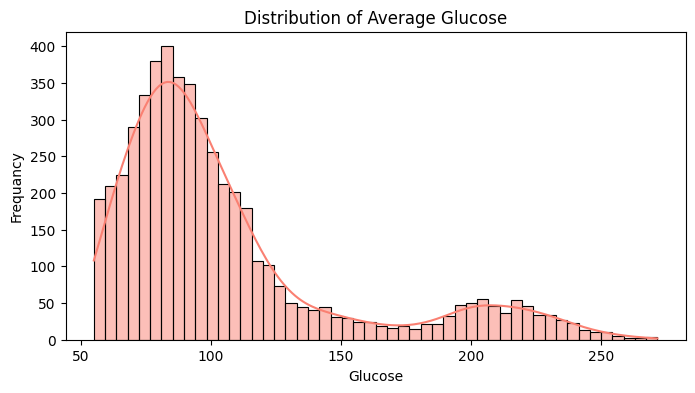

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(df_be['age'],bins=20, kde= True, color='skyblue' )
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequancy')
plt.show()
plt.figure(figsize=(8,4))
sns.histplot(df_be['bmi'],bins=30, kde= True, color='green' )
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequancy')
plt.show()
plt.figure(figsize=(8,4))
sns.histplot(df_be['avg_glucose_level'],bins=50, kde= True, color='salmon' )
plt.title('Distribution of Average Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequancy')
plt.show()

Distribution of numerical features by output 'stroke'

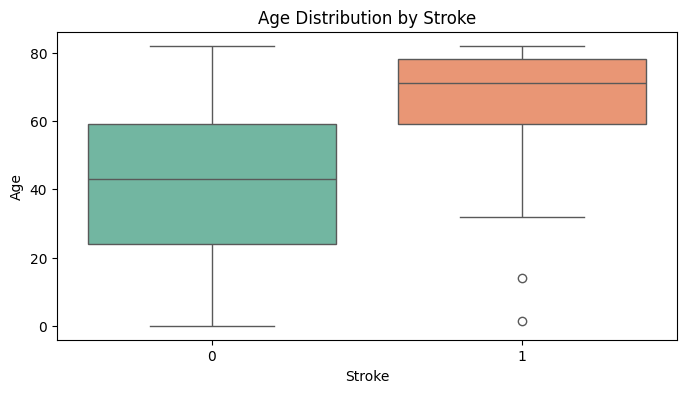

In [24]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_be, x='stroke', y='age', palette='Set2')
plt.title('Age Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

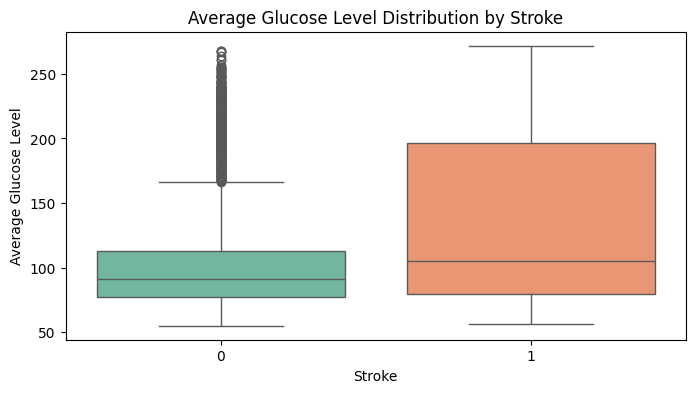

In [25]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_be, x='stroke', y='avg_glucose_level', palette='Set2')
plt.title('Average Glucose Level Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()

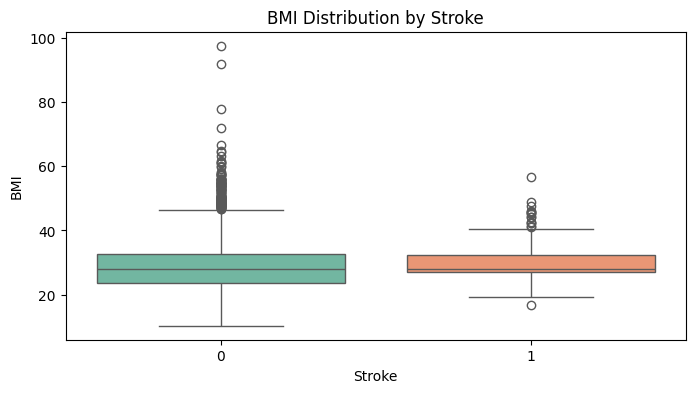

In [26]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_be, x='stroke', y='bmi', palette='Set2')
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

Based on the above, we can notice that individuals who are older with higher glucose level were more likely to have a stroke. Also, we notice that bmi index might not be significant indicator for probability of getting a stroke

In [27]:
df_be.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Encoding of dataset

  Enconding of Categorical features : Based on data type, we will use OneHotEncoder to avoid ordinalty assumptions. However, first column of each encoded feature will be dropped to reduce multicollinearity and reduce number of features

In [28]:
# categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
# categorical_data = df_be[categorical_variables]
# encoder = OneHotEncoder(sparse_output = False, drop ='first')
# encoded_data = encoder.fit_transform(categorical_data)
# encoded_dataframe = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_variables))
# df = pd.concat([df_be.drop(columns=categorical_variables), encoded_dataframe], axis=1)
# df.head(5)

In [29]:
df = pd.get_dummies(df_be, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True, dtype=int)
df

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0     67.0             0              1             228.69  36.6       1   
1     61.0             0              0             202.21  28.1       1   
2     80.0             0              1             105.92  32.5       1   
3     49.0             0              0             171.23  34.4       1   
4     79.0             1              0             174.12  24.0       1   
...    ...           ...            ...                ...   ...     ...   
5105  80.0             1              0              83.75  28.1       0   
5106  81.0             0              0             125.20  40.0       0   
5107  35.0             0              0              82.99  30.6       0   
5108  51.0             0              0             166.29  25.6       0   
5109  44.0             0              0              85.28  26.2       0   

      gender_Male  ever_married_Yes  work_type_Never_worked  \
0               1                 1                       0   
1               0                 1                       0   
2               1                 1                       0   
3               0                 1                       0   
4               0                 1                       0   
...           ...               ...                     ...   
5105            0                 1                       0   
5106            0                 1                       0   
5107            0                 1                       0   
5108            1                 1                       0   
5109            0                 1                       0   

      work_type_Private  work_type_Self-employed  work_type_children  \
0                     1                        0                   0   
1                     0                        1                   0   
2                     1                        0                   0   
3                     1                        0                   0   
4                     0                        1                   0   
...                 ...                      ...                 ...   
5105                  1                        0                   0   
5106                  0                        1                   0   
5107                  0                        1                   0   
5108                  1                        0                   0   
5109                  0                        0                   0   

      Residence_type_Urban  smoking_status_formerly smoked  \
0                        1                               1   
1                        0                               0   
2                        0                               0   
3                        1                               0   
4                        0                               0   
...                    ...                             ...   
5105                     1                               0   
5106                     1                               0   
5107                     0                               0   
5108                     0                               1   
5109                     1                               0   

      smoking_status_never smoked  smoking_status_smokes  
0                               0                      0  
1                               1                      0  
2                               1                      0  
3                               0                      1  
4                               1                      0  
...                           ...                    ...  
5105                            1                      0  
5106                            1                      0  
5107                            1                      0  
5108                            0                      0  
5109                            0                      0  

[5109 rows x 16 co

In [30]:
df.shape

(5109, 16)

In [31]:
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
ever_married_Yes                  0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [32]:
df.head()

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
1  61.0             0              0             202.21  28.1       1   
2  80.0             0              1             105.92  32.5       1   
3  49.0             0              0             171.23  34.4       1   
4  79.0             1              0             174.12  24.0       1   

   gender_Male  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0            1                 1                       0                  1   
1            0                 1                       0                  0   
2            1                 1                       0                  1   
3            0                 1                       0                  1   
4            0                 1                       0                  0   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                        0                   0                     1   
1                        1                   0                     0   
2                        0                   0                     0   
3                        0                   0                     1   
4                        1                   0                     0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1   
2                               0                            1   
3                               0                            0   
4                               0                            1   

   smoking_status_smokes  
0                      0  
1                      0  
2                      0  
3                      1  
4                      0

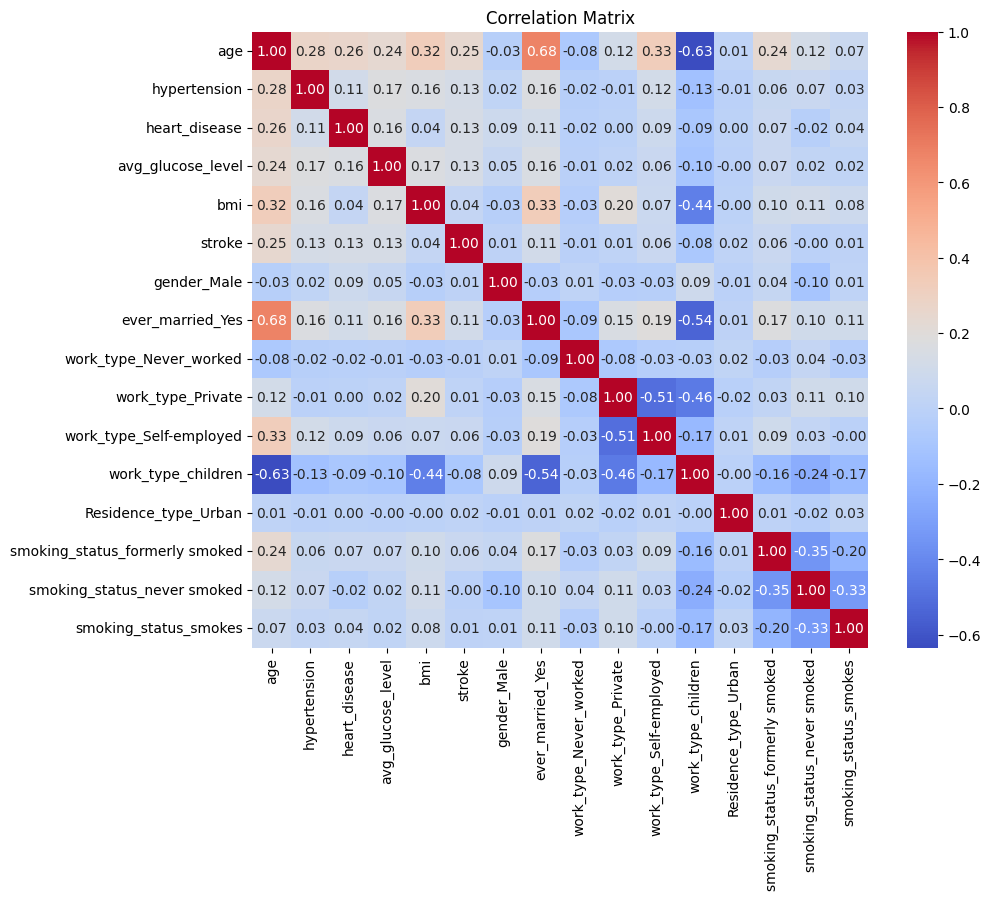

In [33]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

* Maybe we should consider dropping (work_type_children) as its highly correlated with age, ever_married ?? Conifrm with team

Features Relatioship with the output stroke

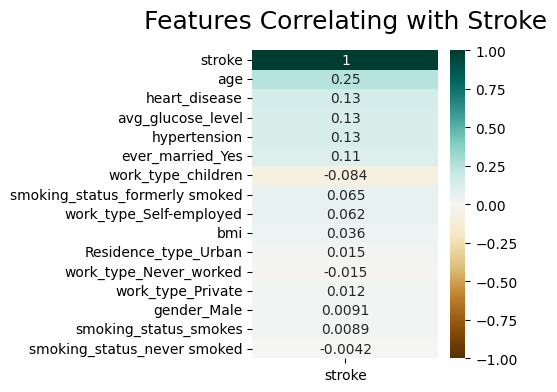

In [34]:
plt.figure(figsize=(3, 4))
heatmap = sns.heatmap(df.corr()[['stroke']].sort_values(by='stroke', key=abs, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Stroke', fontdict={'fontsize':18}, pad=16);

Based on the above understanding of the features we notice that : age, heart disease, average glucose level, hypertension ,and marriage status are the mostly influenced features with stroke. However, smoking status, gender are the least correlated to stroke.

Based on the correlation matrix, we determined that the 'work_type_children' column can be dropped as it is highly correlated with other independent variables (i.e., age, ever_married_Yes). In addition, further analysis showed that it is not strongly correlated with the output variable, 'stroke'. Therefore, dropping this column may reduce some of the multicollinearity and will not have an affect on accurately predicting the target variable.  

In [35]:
df.drop(['work_type_children'], axis=1, inplace=True)

In [36]:
df.shape

(5109, 15)

## Outlier Detection

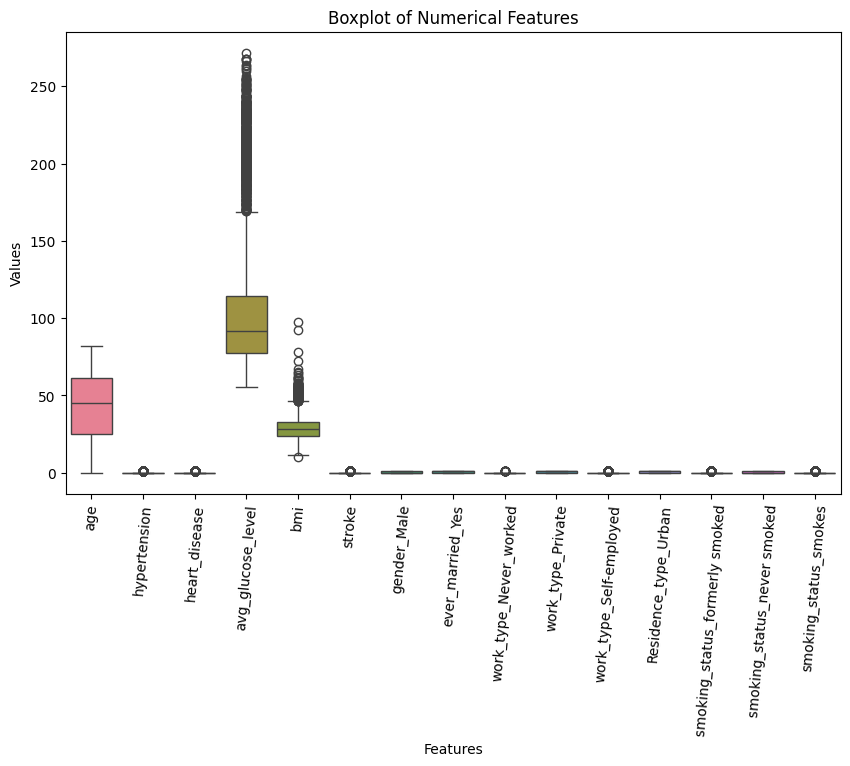

In [37]:
plt.figure(figsize = (10,6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=85)  # Rotate x-axis labels for better readability
plt.show()

## Handling Skewness

In [38]:
df.skew().sort_values(ascending=False)

work_type_Never_worked            15.144843
stroke                             4.192807
heart_disease                      3.946786
hypertension                       2.715026
smoking_status_smokes              1.913132
work_type_Self-employed            1.852301
smoking_status_formerly smoked     1.729277
avg_glucose_level                  1.572815
bmi                                1.087929
smoking_status_never smoked        0.537226
gender_Male                        0.349410
Residence_type_Urban              -0.032506
age                               -0.137430
work_type_Private                 -0.292454
ever_married_Yes                  -0.658345
dtype: float64

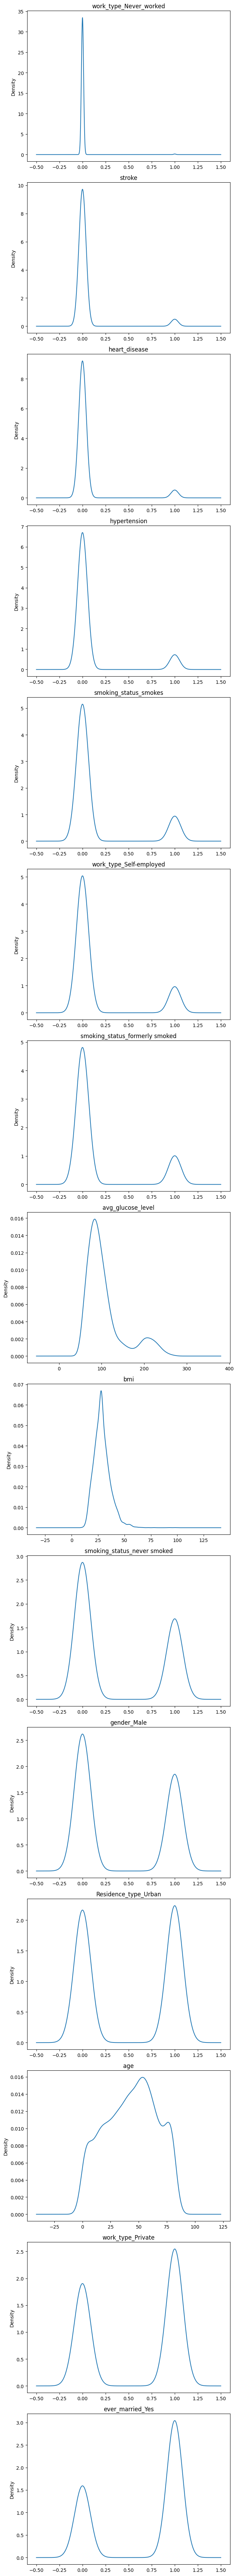

In [39]:
# Visualizing skewness for each attribute in the dataset
# List of parameters for density plot
parameters = ['work_type_Never_worked', 'stroke', 'heart_disease', 'hypertension',
              'smoking_status_smokes', 'work_type_Self-employed',
              'smoking_status_formerly smoked', 'avg_glucose_level', 'bmi',
              'smoking_status_never smoked', 'gender_Male', 'Residence_type_Urban',
              'age', 'work_type_Private', 'ever_married_Yes']

# Create subplots
fig, axes = plt.subplots(len(parameters), 1, figsize=(7, 5 * len(parameters)))

# Loop through parameters and plot density plots
for i, param in enumerate(parameters):
    df[param].plot(kind='density', ax=axes[i])
    axes[i].set_title(param)

plt.tight_layout()
plt.show()

In [40]:
# List of attributes to analyze
attributes = ['stroke', 'heart_disease', 'hypertension', 'avg_glucose_level', 'bmi',
    'age', 'gender_Male', 'Residence_type_Urban', 'ever_married_Yes',
    'work_type_Private', 'work_type_Self-employed',
    'work_type_Never_worked', 'smoking_status_smokes',
    'smoking_status_formerly smoked', 'smoking_status_never smoked']
# Dictionary to store skewness before and after transformations
skewness_results = {}

for attribute in attributes:
    try:
        # Display skewness before transformation
        attribute_skewness = df[attribute].skew()
        print(f"\nSkewness of '{attribute}': {attribute_skewness}")

        # Apply log transformation
        log_attribute = np.log1p(df[attribute])
        log_skewness = log_attribute.skew()
        print(f"Skewness after Log Transformation: {log_skewness}")

        # Apply sqrt transformation
        sqrt_attribute = df[attribute]**(1/2)
        sqrt_skewness = sqrt_attribute.skew()
        print(f"Skewness after Square Root Transformation: {sqrt_skewness}")

        # Apply reciprocal transformation
        reciprocal_attribute = 1 / df[attribute]
        reciprocal_skewness = reciprocal_attribute.skew()
        print(f"Skewness after Reciprocal Transformation: {reciprocal_skewness}")

        # Apply Box-Cox transformation
        bcx_attribute, _ = boxcox(df[attribute])
        bcx_skewness = pd.Series(bcx_attribute).skew()
        print(f"Skewness after Box-Cox Transformation: {bcx_skewness}")

        # Apply Yeo-Johnson transformation
        yf_attribute, _ = yeojohnson(df[attribute])
        yf_skewness = pd.Series(yf_attribute).skew()
        print(f"Skewness after Yeo-Johnson Transformation: {yf_skewness}")

        # Store skewness results in dictionary
        skewness_results[attribute] = {
            'Original': attribute_skewness,
            'Log': log_skewness,
            'Square Root': sqrt_skewness,
            'Reciprocal': reciprocal_skewness,
            'Box-Cox': bcx_skewness,
            'Yeo-Johnson': yf_skewness
        }
    except Exception as e:
        print(f"Error occurred while processing '{attribute}': {e}")


Skewness of 'stroke': 4.1928068074994735
Skewness after Log Transformation: 4.192806807499474
Skewness after Square Root Transformation: 4.1928068074994735
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'stroke': Data must be positive.

Skewness of 'heart_disease': 3.9467864430646906
Skewness after Log Transformation: 3.9467864430646906
Skewness after Square Root Transformation: 3.9467864430646906
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'heart_disease': Data must be positive.

Skewness of 'hypertension': 2.715026136949753
Skewness after Log Transformation: 2.7150261369497537
Skewness after Square Root Transformation: 2.715026136949753
Skewness after Reciprocal Transformation: nan
Error occurred while processing 'hypertension': Data must be positive.

Skewness of 'avg_glucose_level': 1.5728153284961561
Skewness after Log Transformation: 0.8900502459430992
Skewness after Square Root Transformation: 1.243310584696458
Sk

In [41]:
# ## Applying skewness from calculated
df['avg_glucose_level'], lambda_bc = boxcox(df['avg_glucose_level'])
df['bmi'], lambda_yj = yeojohnson(df['bmi'])

# df['avg_glucose_level'] = np.reciprocal(df['avg_glucose_level'])
# df['bmi'] = np.log(df['bmi'])

In [42]:
df.skew().sort_values(ascending=False)

work_type_Never_worked            15.144843
stroke                             4.192807
heart_disease                      3.946786
hypertension                       2.715026
smoking_status_smokes              1.913132
work_type_Self-employed            1.852301
smoking_status_formerly smoked     1.729277
smoking_status_never smoked        0.537226
gender_Male                        0.349410
avg_glucose_level                  0.083304
bmi                               -0.001035
Residence_type_Urban              -0.032506
age                               -0.137430
work_type_Private                 -0.292454
ever_married_Yes                  -0.658345
dtype: float64

## Label Selection

In [43]:
y = df['stroke']
x = df.drop('stroke',axis=1)

## Data Splitting

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## sampling strategy

In [45]:
x_train.shape

(4087, 14)

In [46]:
y_train.shape

(4087,)

In [47]:
y_train.value_counts()

stroke
0    3900
1     187
Name: count, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Assuming you have X_train, y_train as your training data and labels
# Check the class distribution before adjustment
print("Before adjusting class size:")
print(Counter(y_train))

# Define the resampling strategy
oversampler = SMOTE(sampling_strategy=0.6)  # Example: increase minority class by 50%
undersampler = RandomUnderSampler(sampling_strategy=0.9)  # Example: reduce majority class to 80%

# Perform resampling
X_train_sampled, y_train_sampled = oversampler.fit_resample(x_train, y_train)
print(y_train_sampled.value_counts())
print(X_train_sampled.shape)
print(y_train_sampled.shape)

X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_sampled, y_train_sampled)

print(y_train_resampled.value_counts())
print(X_train_resampled.shape)
print(y_train_resampled.shape)
# Check the class distribution after adjustment
print("After adjusting class size:")
print(Counter(y_train_resampled))

Before adjusting class size:
Counter({0: 3900, 1: 187})
stroke
0    3900
1    2340
Name: count, dtype: int64
(6240, 14)
(6240,)
stroke
0    2600
1    2340
Name: count, dtype: int64
(4940, 14)
(4940,)
After adjusting class size:
Counter({0: 2600, 1: 2340})


In [49]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train_resampled)
scaled_x_test = scaler.transform(x_test)

In [50]:
scaled_x_train.shape

(4940, 14)

In [51]:
y_train_resampled.shape

(4940,)

## Handling Imbalance in target variable

In [52]:
# train_df = pd.concat([x_train, y_train], axis=1)

In [53]:
# train_df.to_excel('train_dataset.xlsx', index=False)

In [54]:
# pip install imbalanced-learn

In [55]:
# smote = SMOTE(random_state=42)

In [56]:
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [57]:
# x_resampled_df = pd.DataFrame(x_train_resampled, columns=x.columns)
# y_resampled_df = pd.DataFrame(y_train_resampled, columns=['stroke'])

In [58]:
# balanced_train_df = pd.concat([x_resampled_df, y_resampled_df], axis=1)

In [59]:
# balanced_train_df.to_excel('balanced_dataset.xlsx', index=False)

## Data Splitting after SMOTE

In [60]:
# y_train = balanced_train_df['stroke']
# x_train = balanced_train_df.drop('stroke', axis=1)

## Normalization

In [61]:
# scaler = StandardScaler()
# scaled_x_train = scaler.fit_transform(x_train)
# scaled_x_test = scaler.transform(x_test)

In [62]:
# scaled_x_train.shape

In [63]:
# y_train.shape

## Principle Component Analysis

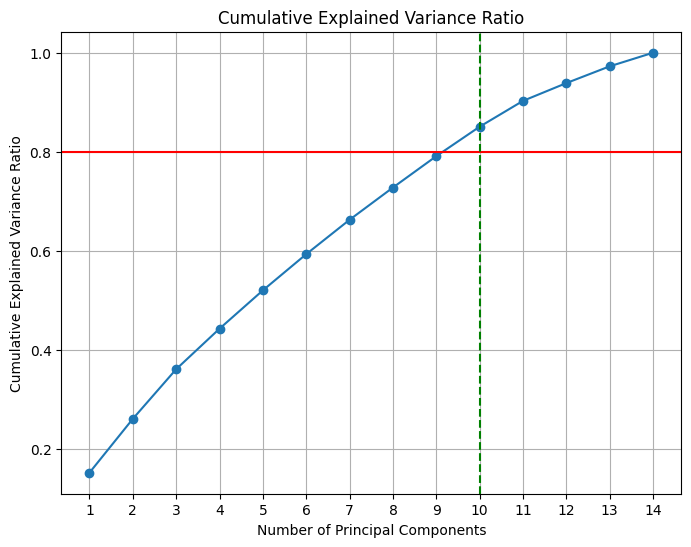

In [64]:
pca = PCA ()
pca.fit(scaled_x_train)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = np.arange(1, len(explained_variance_ratio) + 1)
index_80_percent = np.argmax(cumulative_variance_ratio >= 0.8) + 1

plt.figure(figsize=(8, 6))
plt.plot(n_components, cumulative_variance_ratio, marker='o', linestyle='-')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.axvline(x=index_80_percent, color='g', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.xticks(n_components)
plt.show()

In [65]:
# pca = PCA(n_components=11)
# X_train_pca = pca.fit_transform(scaled_x_train)
# X_val_pca = pca.fit_transform(scaled_x_val)
# X_test_pca = pca.transform(scaled_x_test)

# Model Training

## Support Vector Machine

In [ ]:
svc = SVC(kernel='linear', probability=True)
svc.fit(scaled_x_train, y_train_resampled)
predicted_output = svc.predict(scaled_x_test)
accuracy = metrics.accuracy_score(y_test, predicted_output) * 100
print("Accuracy:",accuracy,"%")

metrics_report = metrics.classification_report(y_test, predicted_output)
print(metrics_report)

print("f1 score : ", f1_score(y_test, predicted_output))


Accuracy: 78.37573385518591 %
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       960
           1       0.14      0.50      0.22        62

    accuracy                           0.78      1022
   macro avg       0.55      0.65      0.55      1022
weighted avg       0.91      0.78      0.83      1022

f1 score :  0.21908127208480568


[[770 190]
 [ 31  31]]


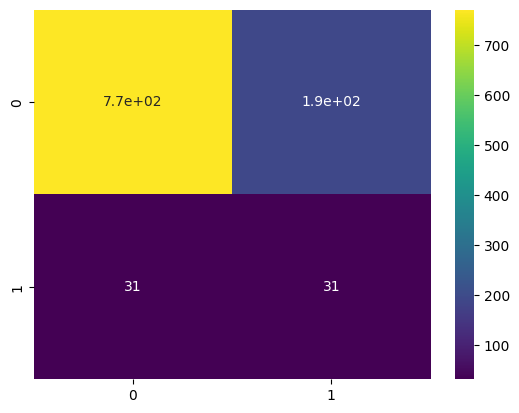

In [ ]:
cmatrix = confusion_matrix(y_test,predicted_output)
print(cmatrix)

sns.heatmap(confusion_matrix(y_test,predicted_output),cmap='viridis',annot=True);

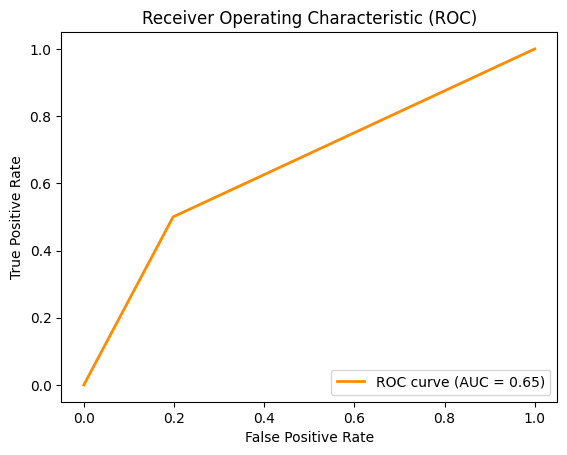

AUC value is: 0.6510416666666666


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_output)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)

## Logistic Regression

Accuracy: 80.14%
Confusion Matrix:
 [[791 169]
 [ 34  28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89       960
           1       0.14      0.45      0.22        62

    accuracy                           0.80      1022
   macro avg       0.55      0.64      0.55      1022
weighted avg       0.91      0.80      0.85      1022

f1 score :  0.2162162162162162


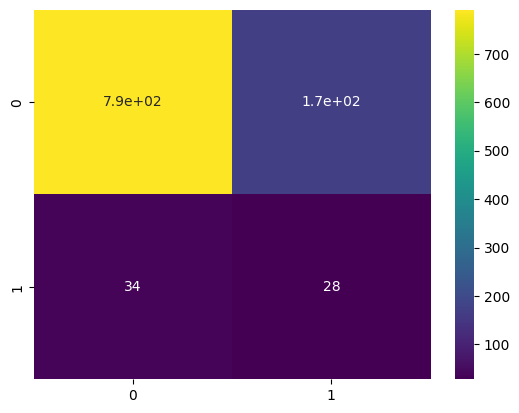

In [ ]:


# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# fit the model with data
# logreg.fit(X_train_pca, y_train)
logreg.fit(scaled_x_train, y_train_resampled)

# y_pred = logreg.predict(X_test_pca)
y_pred = logreg.predict(scaled_x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
# print(cnf_matrix)

# metrics_report = metrics.classification_report(y_test, y_pred)
# print(metrics_report)

# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("f1 score : ", f1_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),cmap='viridis',annot=True);

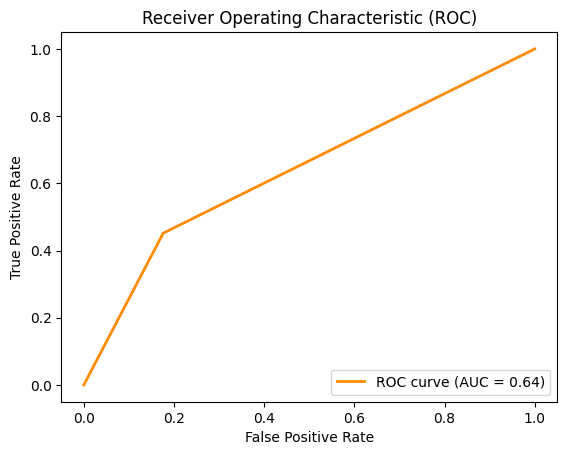

AUC value is: 0.6377856182795699


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)

## Random Forest

Accuracy Score:  0.7338551859099804
Confusion Matrix:
 [[697 263]
 [  9  53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.73      0.84       960
           1       0.17      0.85      0.28        62

    accuracy                           0.73      1022
   macro avg       0.58      0.79      0.56      1022
weighted avg       0.94      0.73      0.80      1022

f1 score :  0.2804232804232804


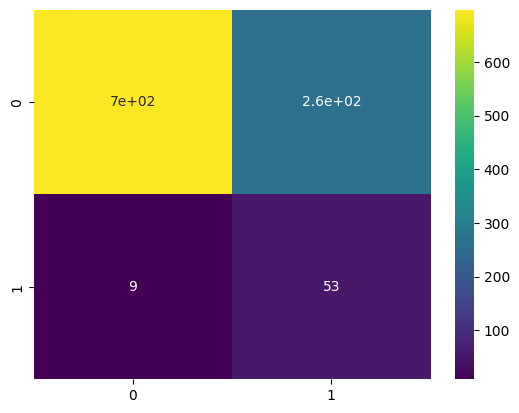

In [ ]:
randomforest = RandomForestClassifier()
rfc_1 = RandomForestClassifier(max_features=7,max_depth=3,n_estimators=64,bootstrap=False)
rfc_1.fit(scaled_x_train,y_train_resampled)
rfc_pred = rfc_1.predict(scaled_x_test)
# print(metrics.classification_report(y_test,rfc_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, rfc_pred))
print("\nClassification Report:\n", classification_report(y_test, rfc_pred))
print("f1 score : ", f1_score(y_test, rfc_pred))
# print("OOB Score:", rfc_1.oob_score_)
sns.heatmap(confusion_matrix(y_test,rfc_pred),cmap='viridis',annot=True);

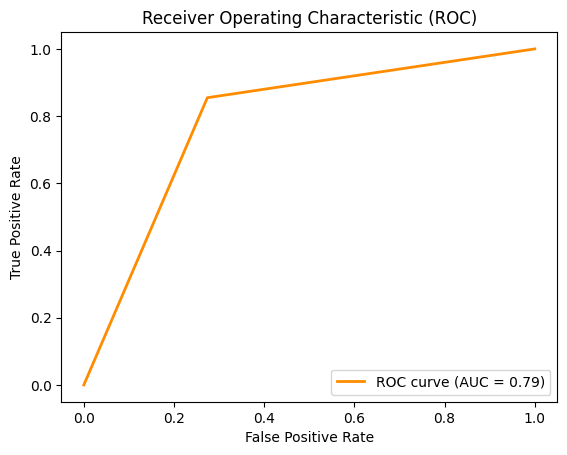

AUC value is: 0.7904401881720431


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, rfc_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)

In [ ]:
feature_importances = rfc_1.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [7.27612120e-01 0.00000000e+00 6.39337422e-04 7.08877581e-02
 9.87059083e-02 2.76838368e-02 1.69979299e-02 0.00000000e+00
 1.99582274e-03 7.89527325e-03 1.14551863e-02 1.88079460e-03
 3.17849517e-02 2.46108137e-03]


In [ ]:
features =['age','hypertension','heart_disease','avg_glucose_level',
           'bmi','gender_Male','ever_married_Yes','work_type_Never_worked',
           'work_type_Private','work_type_Self-employed','Residence_type_Urban', 'smoking_status_formerly smoked',
           'smoking_status_never smoked', 'smoking_status_smokes']

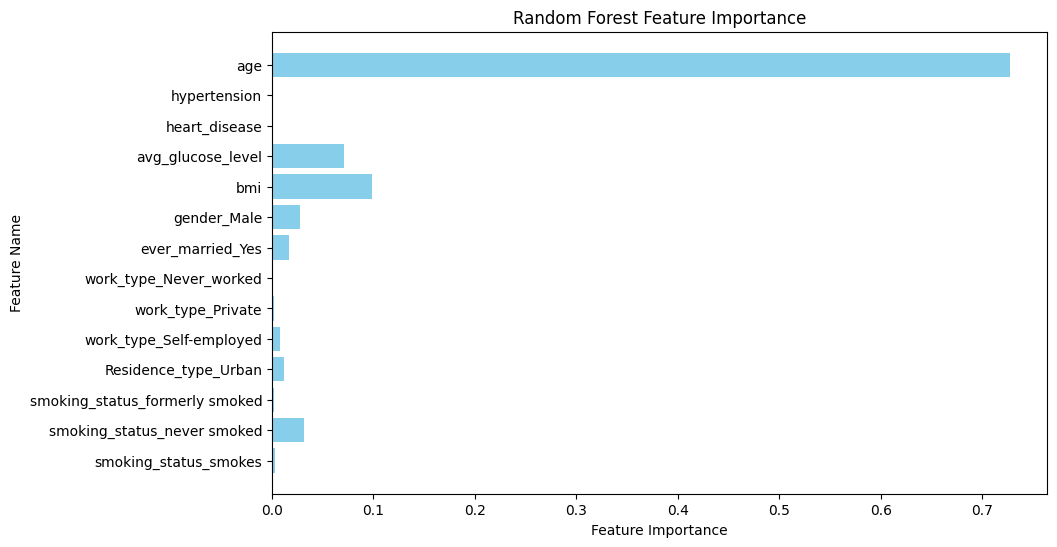

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

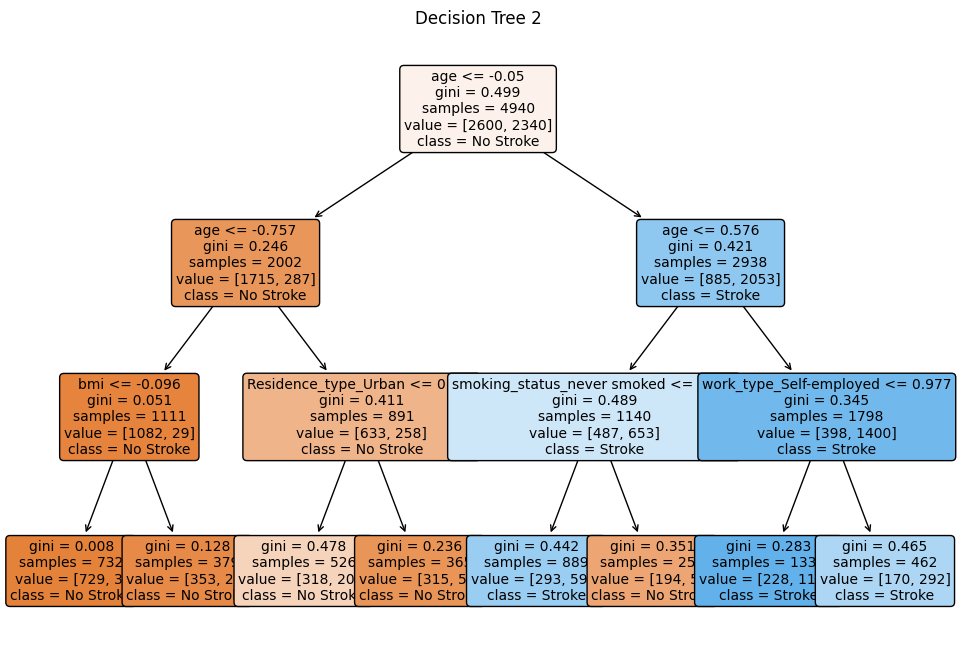

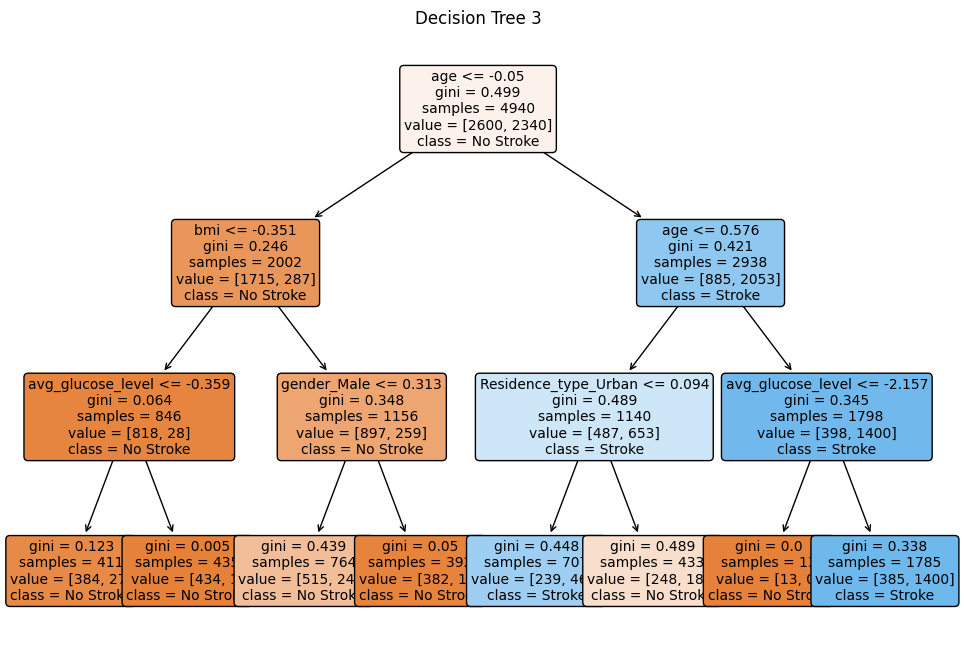

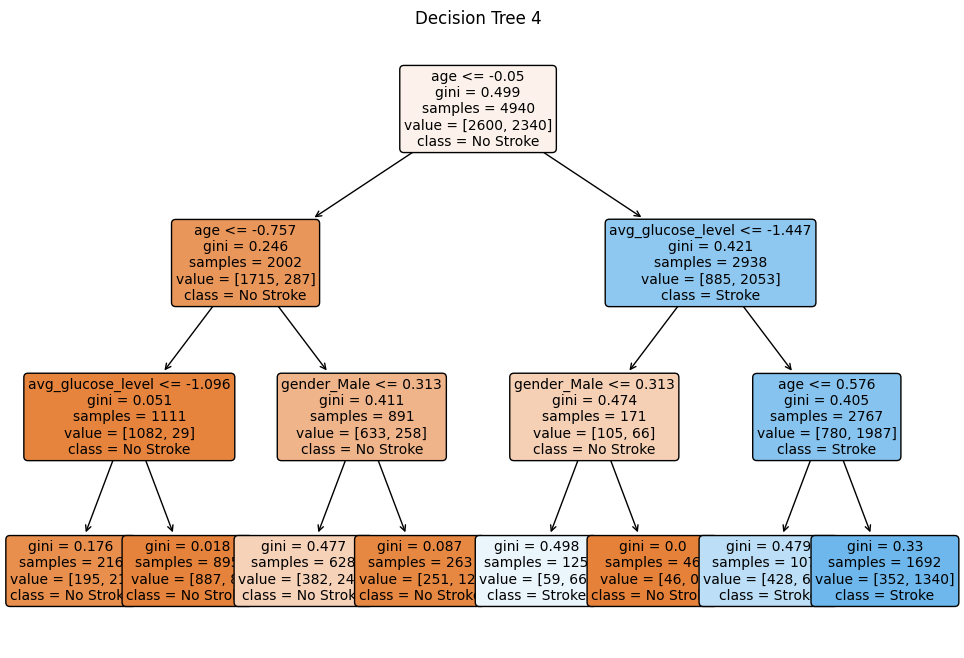

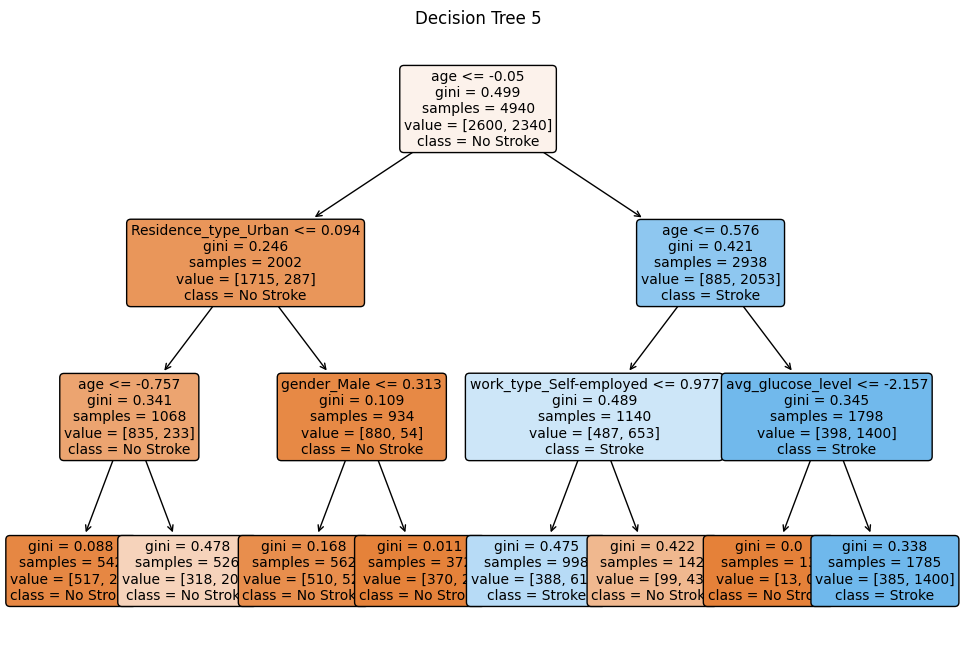

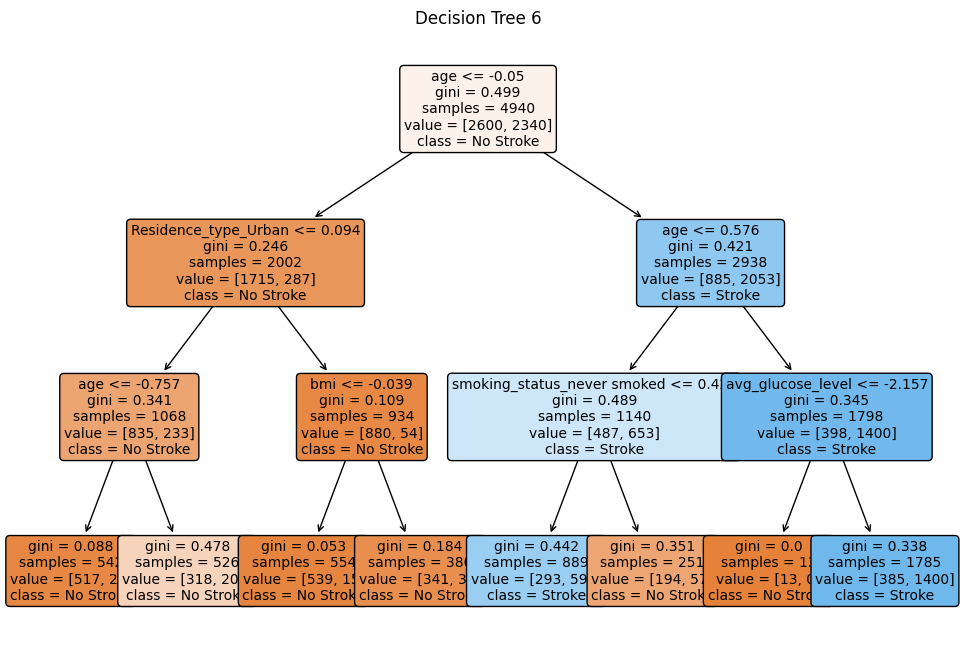

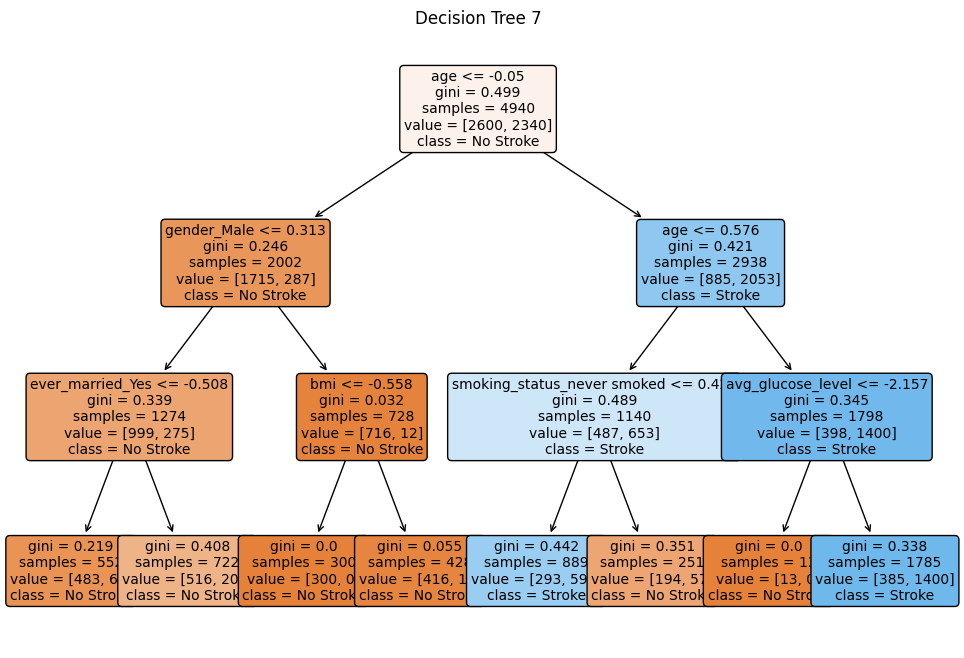

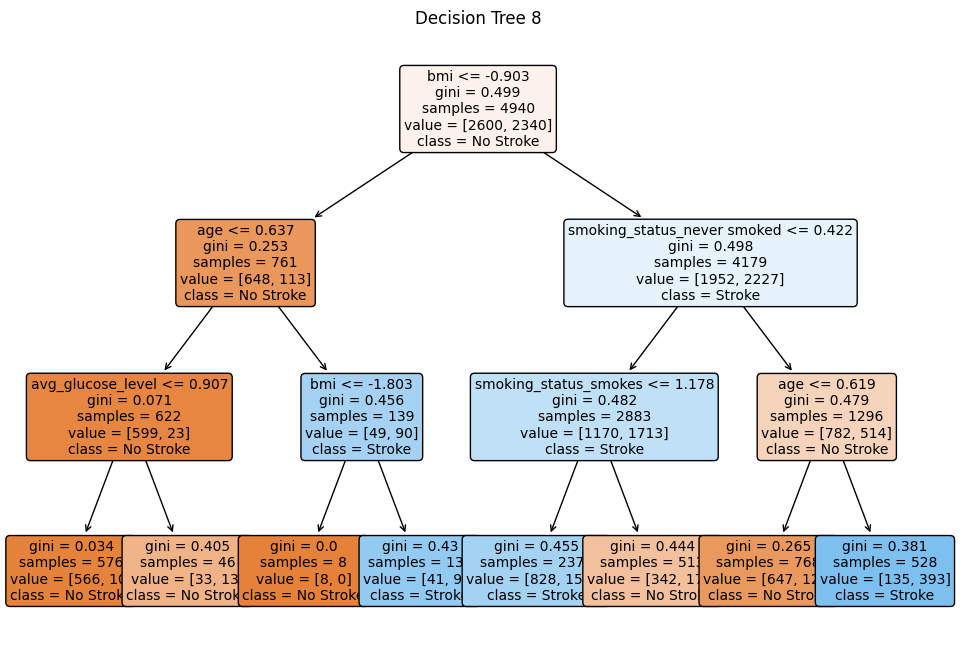

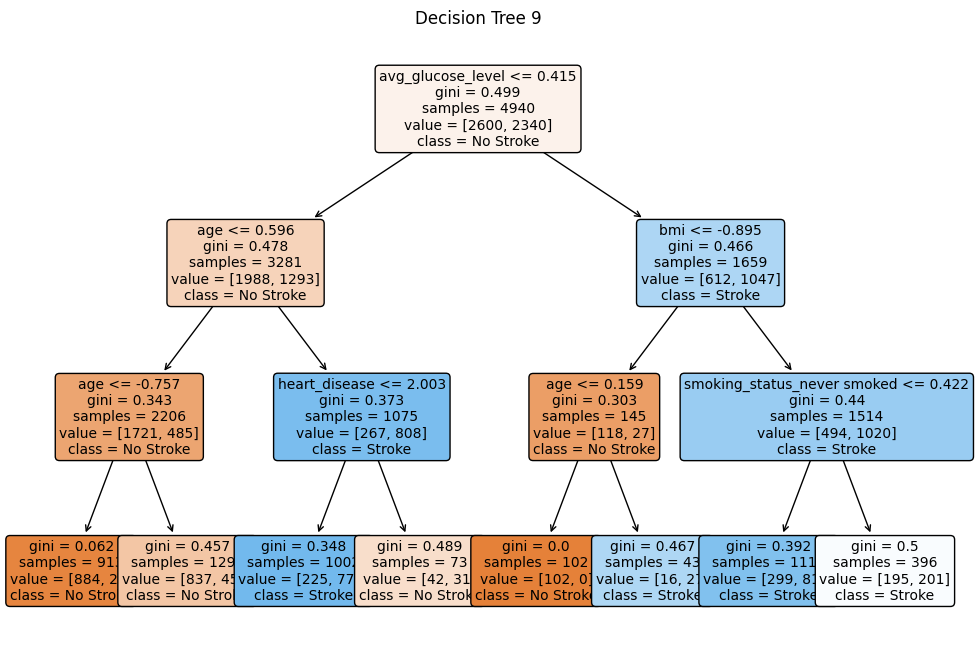

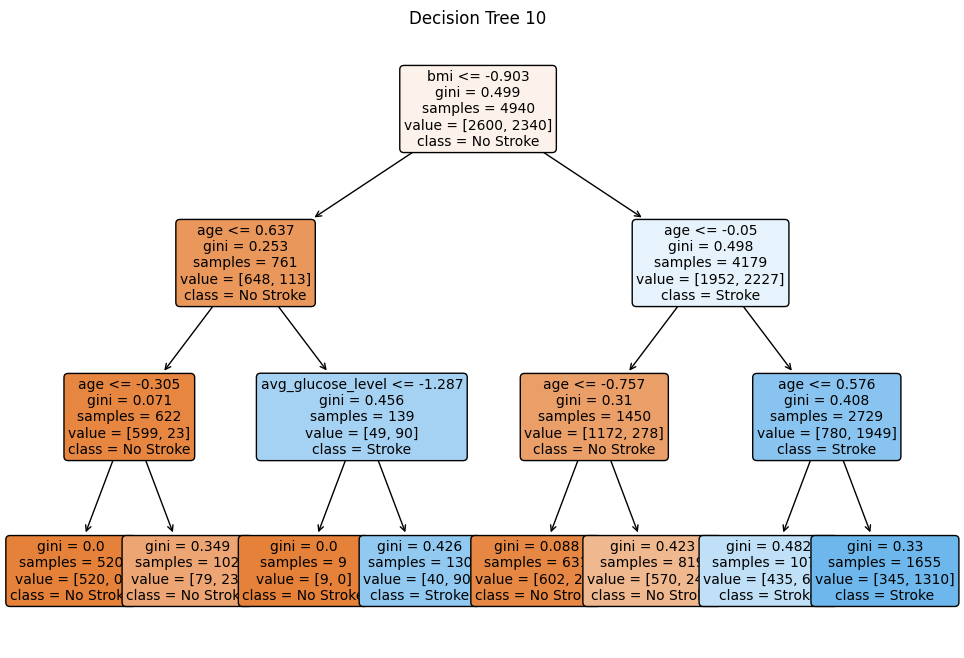

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming rfc is your RandomForestClassifier object

# Visualize each decision tree in the Random Forest
for i in range(1,10):
    tree = rfc_1.estimators_[i]  # Access each decision tree in the forest
    plt.figure(figsize=(12, 8))
    plot_tree(tree,
              filled=True,
              feature_names=features,
              class_names=['No Stroke', 'Stroke'],
              rounded=True,
              fontsize=10)
    plt.title(f'Decision Tree {i+1}')
    plt.show()

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       960
           1       0.15      0.24      0.18        62

    accuracy                           0.87      1022
   macro avg       0.55      0.58      0.56      1022
weighted avg       0.90      0.87      0.88      1022

Accuracy Score:  0.8698630136986302
OOB Score: 0.9281376518218624
f1 score :  0.2162162162162162


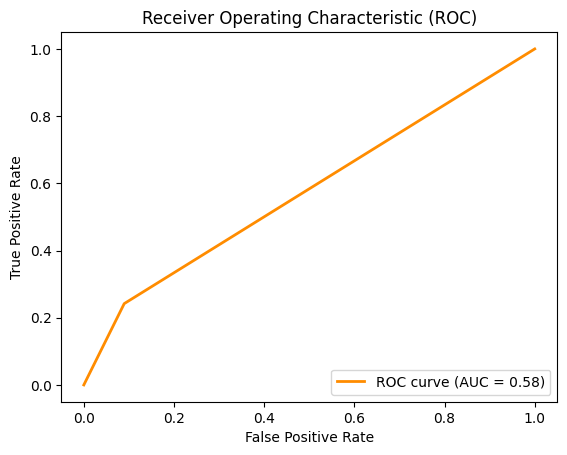

AUC value is: 0.5761760752688172


In [ ]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=20,n_estimators=64,oob_score=True)
rfc.fit(scaled_x_train,y_train_resampled)
rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))
print("OOB Score:", rfc.oob_score_)
print("f1 score : ", f1_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, rfc_tuned_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       960
           1       0.15      0.34      0.21        62

    accuracy                           0.85      1022
   macro avg       0.55      0.61      0.56      1022
weighted avg       0.91      0.85      0.87      1022

Accuracy Score:  0.8463796477495108
f1 score :  0.2162162162162162


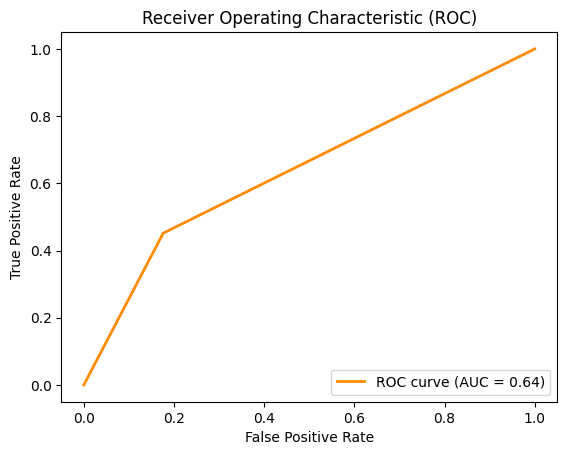

AUC value is: 0.6377856182795699


In [ ]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=10,n_estimators=64,bootstrap=False)
rfc.fit(scaled_x_train,y_train_resampled)
rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))
print("f1 score : ", f1_score(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       960
           1       0.15      0.26      0.19        62

    accuracy                           0.87      1022
   macro avg       0.55      0.58      0.56      1022
weighted avg       0.90      0.87      0.88      1022

Accuracy Score:  0.8679060665362035
OOB Score: 0.9236842105263158
f1 score :  0.19161676646706585


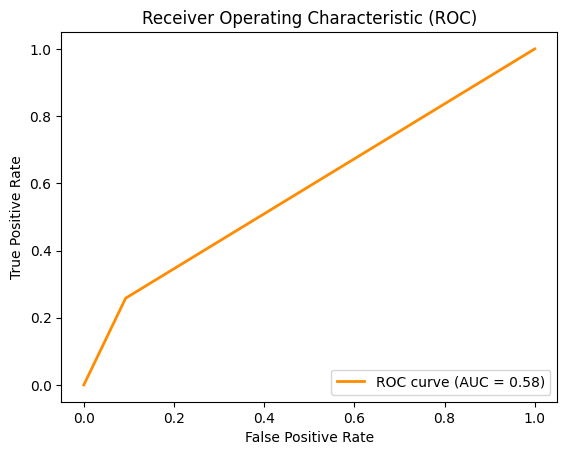

AUC value is: 0.5826780913978494


In [ ]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=15,n_estimators=64, oob_score=True)
rfc.fit(scaled_x_train,y_train_resampled)
rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))
print("OOB Score:", rfc.oob_score_)
print("f1 score : ", f1_score(y_test, rfc_tuned_pred))

fpr, tpr, thresholds = roc_curve(y_test, rfc_tuned_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       960
           1       0.18      0.58      0.27        62

    accuracy                           0.81      1022
   macro avg       0.57      0.70      0.58      1022
weighted avg       0.92      0.81      0.85      1022

Accuracy Score:  0.812133072407045
f1 score :  0.2727272727272727


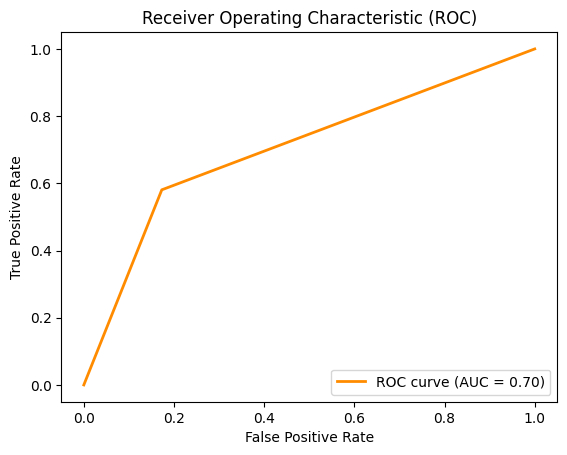

AUC value is: 0.703864247311828


In [ ]:
randomforest = RandomForestClassifier()
rfc = RandomForestClassifier(max_features=7,max_depth=7,n_estimators=64,bootstrap=False)
rfc.fit(scaled_x_train,y_train_resampled)
rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))

print('Accuracy Score: ',accuracy_score(y_test,rfc_tuned_pred))

print("f1 score : ", f1_score(y_test, rfc_tuned_pred))

fpr, tpr, thresholds = roc_curve(y_test, rfc_tuned_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)

### Hyper parameter tuning for Random Foorest using Grid Search

In [74]:
n_estimators =[64,100,128,200]
max_features = [2,3,5,7]
bootstrap = [True,False]
max_depth = [3,7,10,15,20,30]
max_features =['sqrt', 'log2']

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
              'max_depth':max_depth,
              'max_features':max_features}

In [75]:
randomforest = RandomForestClassifier()

grid = GridSearchCV(randomforest,param_grid)

grid.fit(scaled_x_train,y_train_resampled)
grid.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'n_estimators': 64}

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       960
           1       0.12      0.16      0.14        62

    accuracy                           0.88      1022
   macro avg       0.53      0.54      0.54      1022
weighted avg       0.89      0.88      0.89      1022

Accuracy Score:  87.96477495107632 %
[[889  71]
 [ 52  10]]


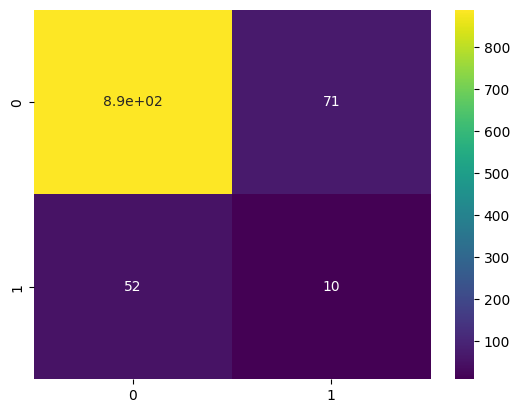

In [79]:
rfc = RandomForestClassifier(max_features='sqrt',n_estimators=64,bootstrap=False, max_depth=20)
rfc.fit(scaled_x_train,y_train_resampled)

rfc_tuned_pred = rfc.predict(scaled_x_test)
print(metrics.classification_report(y_test,rfc_tuned_pred))
accuracy = accuracy_score(y_test,rfc_tuned_pred)
print('Accuracy Score: ',accuracy*100,"%")

cmatrix = confusion_matrix(y_test,rfc_tuned_pred)
print(cmatrix)

sns.heatmap(confusion_matrix(y_test,rfc_tuned_pred),cmap='viridis',annot=True);

AUC value is: 0.543665994623656


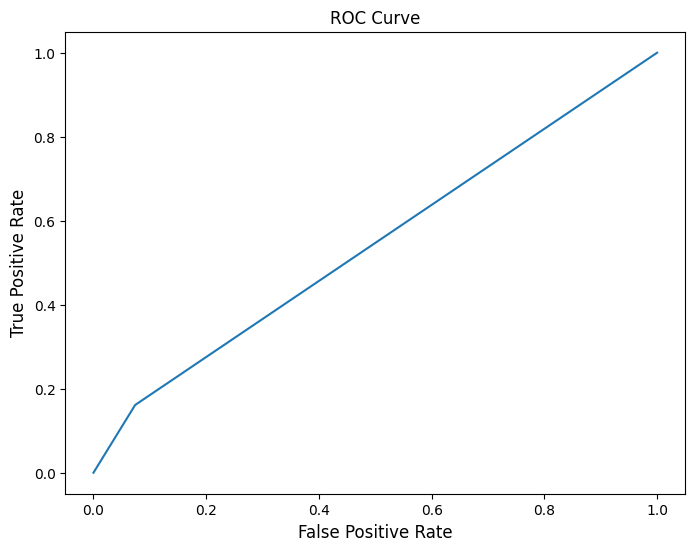

In [80]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, rfc_tuned_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

## Naive Bayes

Accuracy for Gaussian is 18.98238747553816
Confusion Matrix:
 [[132 828]
 [  0  62]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.14      0.24       960
           1       0.07      1.00      0.13        62

    accuracy                           0.19      1022
   macro avg       0.53      0.57      0.19      1022
weighted avg       0.94      0.19      0.23      1022

f1 score :  0.13025210084033612


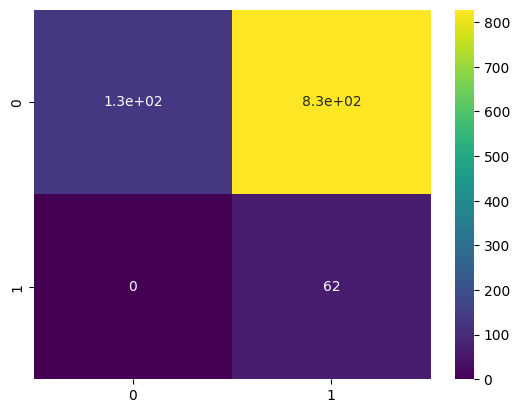

In [ ]:
gaussian_model=GaussianNB()
gaussian_model.fit(scaled_x_train, y_train_resampled)
predicted1 = gaussian_model.predict(scaled_x_test)

print("Accuracy for Gaussian is",accuracy_score(y_test,predicted1)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted1))
print("\nClassification Report:\n", classification_report(y_test, predicted1))

print("f1 score : ", f1_score(y_test, predicted1))
sns.heatmap(confusion_matrix(y_test,predicted1),cmap='viridis',annot=True);

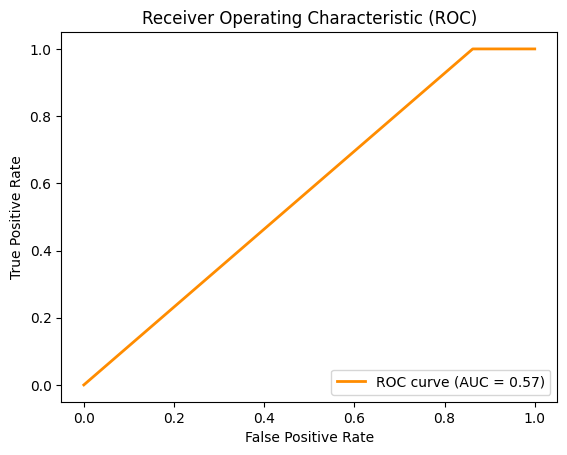

AUC value is: 0.56875


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, predicted1)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
auc_value = auc(fpr, tpr)
print("AUC value is:", auc_value)

Accuracy for Bernoulli is 70.93933463796478
Confusion Matrix:
 [[673 287]
 [ 10  52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.70      0.82       960
           1       0.15      0.84      0.26        62

    accuracy                           0.71      1022
   macro avg       0.57      0.77      0.54      1022
weighted avg       0.93      0.71      0.79      1022

f1 score :  0.25935162094763087


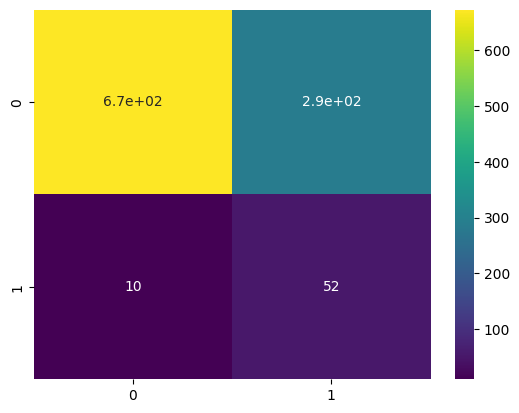

In [ ]:
bernoulli_model=BernoulliNB()
bernoulli_model.fit(scaled_x_train,y_train_resampled)
predicted2=bernoulli_model.predict(scaled_x_test)
print("Accuracy for Bernoulli is",accuracy_score(y_test,predicted2)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted2))
print("\nClassification Report:\n", classification_report(y_test, predicted2))

print("f1 score : ", f1_score(y_test, predicted2))

sns.heatmap(confusion_matrix(y_test,predicted2),cmap='viridis',annot=True);

AUC value is: 0.7698756720430108


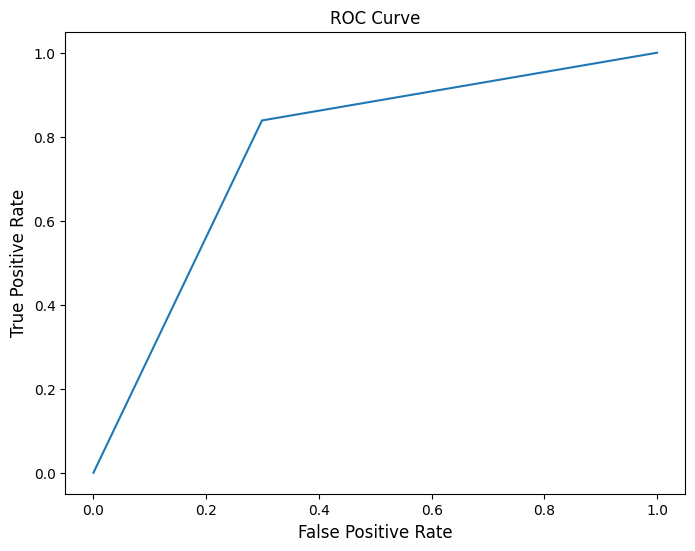

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predicted2)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

In [ ]:
## ValueError: Negative values in data passed to MultinomialNB (input X)
# multinomial_model=MultinomialNB()
# multinomial_model.fit(scaled_x_train,y_train_resampled)
# predicted3=multinomial_model.predict(scaled_x_test)
# print("Accuracy for Multinomial is",accuracy_score(y_test,predicted3)*100)
# print("Confusion Matrix:\n", confusion_matrix(y_test, predicted3))
# print("\nClassification Report:\n", classification_report(y_test, predicted3))

# sns.heatmap(confusion_matrix(y_test,predicted3),cmap='viridis',annot=True);

## XGB

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=10, learning_rate=0.1, max_depth=3, random_state=42)
xgb_clf.fit(scaled_x_train, y_train_resampled)
y_pred_boost = xgb_clf.predict(scaled_x_test)
accuracy = accuracy_score(y_test, y_pred_boost)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred_boost)
print("Confusion Matrix:\n", confusion_mat)

print("f1 score : ", f1_score(y_test, predicted2))

class_report = classification_report(y_test, y_pred_boost)
print("Classification Report:\n", class_report)


Accuracy: 0.7553816046966731
Confusion Matrix:
 [[721 239]
 [ 11  51]]
f1 score :  0.25935162094763087
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.18      0.82      0.29        62

    accuracy                           0.76      1022
   macro avg       0.58      0.79      0.57      1022
weighted avg       0.94      0.76      0.82      1022



AUC value is: 0.7868111559139785


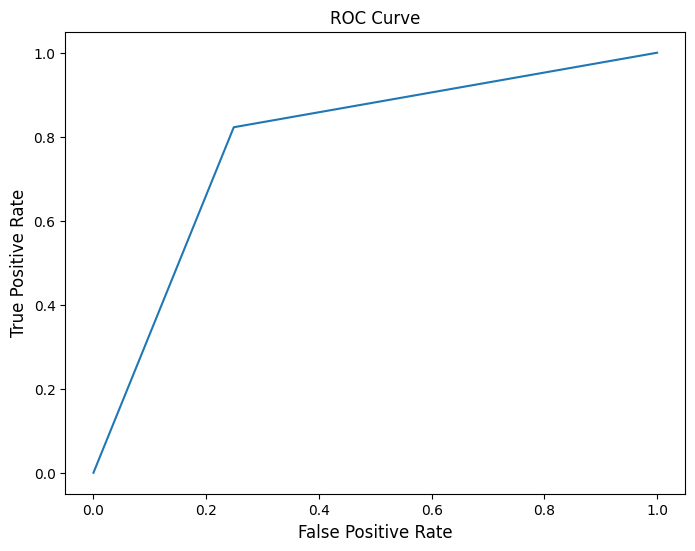

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_boost)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

Accuracy: 0.8317025440313112
Confusion Matrix:
 [[814 146]
 [ 26  36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.90       960
           1       0.20      0.58      0.30        62

    accuracy                           0.83      1022
   macro avg       0.58      0.71      0.60      1022
weighted avg       0.92      0.83      0.87      1022

f1 score :  0.29508196721311475
AUC value is: 0.7142809139784946


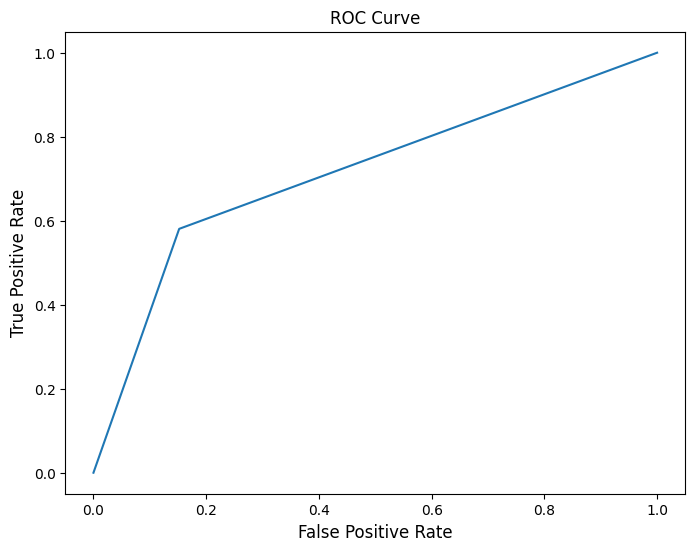

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=15, learning_rate=0.01, max_depth=5, random_state=42)
xgb_clf.fit(scaled_x_train, y_train_resampled)
y_pred = xgb_clf.predict(scaled_x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

print("f1 score : ", f1_score(y_test, y_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)


Accuracy: 0.8679060665362035
Confusion Matrix:
 [[860 100]
 [ 35  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       960
           1       0.21      0.44      0.29        62

    accuracy                           0.87      1022
   macro avg       0.59      0.67      0.61      1022
weighted avg       0.92      0.87      0.89      1022

f1 score :  0.2857142857142857
AUC value is: 0.6656586021505377


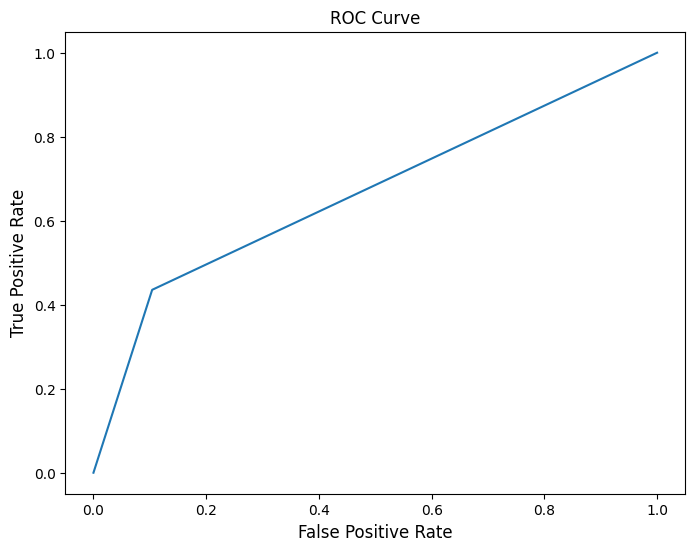

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=15, learning_rate=0.01, max_depth=5, random_state=42, subsample=0.5)
xgb_clf.fit(scaled_x_train, y_train_resampled)
y_pred = xgb_clf.predict(scaled_x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

print("f1 score : ", f1_score(y_test, y_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

Accuracy: 0.7837573385518591
Confusion Matrix:
 [[765 195]
 [ 26  36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.87       960
           1       0.16      0.58      0.25        62

    accuracy                           0.78      1022
   macro avg       0.56      0.69      0.56      1022
weighted avg       0.92      0.78      0.84      1022

f1 score :  0.24573378839590446
AUC value is: 0.6887600806451613


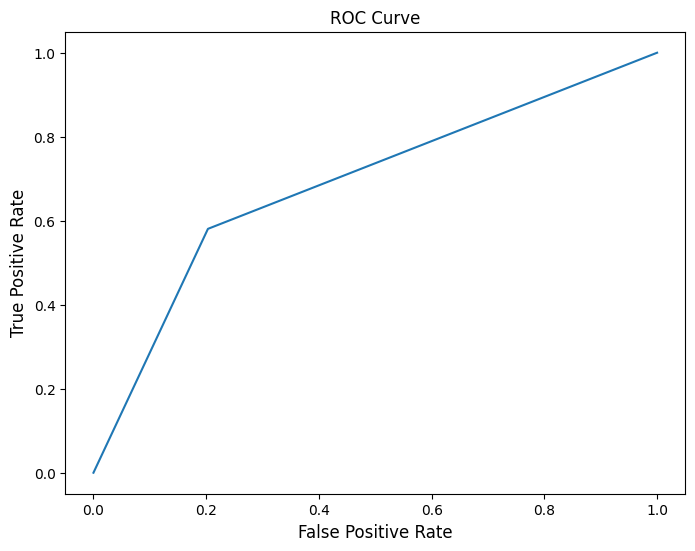

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(n_estimators=50, learning_rate=0.01, max_depth=5, random_state=42)
xgb_clf.fit(scaled_x_train, y_train_resampled)
y_pred = xgb_clf.predict(scaled_x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

print("f1 score : ", f1_score(y_test, y_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [10,20,50,100,300],  # Number of trees
    'max_depth': [3, 5, 7, None],           # Maximum depth of each tree
    'learning_rate': [0.1, 0.01, 0.001],  # Learning rate
    'subsample': [0.8, 0.9, 1.0],     # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
}

# Create Grid Search CV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
grid_search.fit(scaled_x_train, y_train_resampled)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best Score: 0.9449392712550606


Accuracy: 0.8864970645792564
Confusion Matrix:
[[895  65]
 [ 51  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       960
           1       0.14      0.18      0.16        62

    accuracy                           0.89      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.90      0.89      0.89      1022

AUC-ROC Score: 0.72471438172043


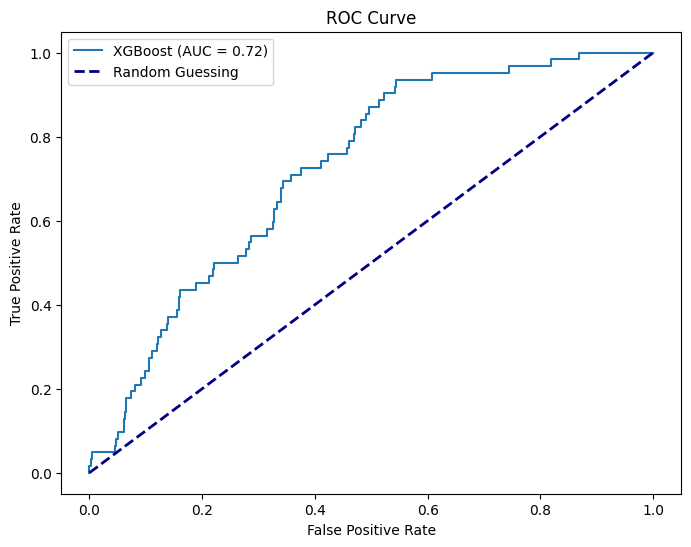

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=best_params['n_estimators'],
                              max_depth=best_params['max_depth'],
                              learning_rate=best_params['learning_rate'],
                              subsample=best_params['subsample'],
                              colsample_bytree=best_params['colsample_bytree'])

# Fit the model on the training data
xgb_model.fit(scaled_x_train, y_train_resampled)

# Predict on the validation set
y_pred = xgb_model.predict(scaled_x_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate AUC-ROC score
y_pred_prob = xgb_model.predict_proba(scaled_x_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_prob)
print("AUC-ROC Score:", auc_roc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost (AUC = {:.2f})'.format(auc_roc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Multi Layer Perceptron

# Validation Splitting

In [66]:
x_train, x_validation, y_train, y_validation = train_test_split(scaled_x_train, y_train_resampled, test_size=0.1, random_state=42)

### Hyper Parameter Tuning for MLP

### Model 1

In [67]:
model = Sequential()
model.add(Dense(10, input_shape=(14,),activation = 'leaky_relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model and calculate its accuracy:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Print a summary of the Keras model:
model.summary()

history = model.fit(x=x_train,y=y_train,validation_data=(x_validation,y_validation),batch_size = 64, epochs=200, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                150       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


32/32 [==============================] - 0s 2ms/step
[[780  32]
 [180  30]]
Deep Learning Accuracy Score:  0.7925636007827789
Deep Learning Precision Score:  0.14285714285714285
Deep Learning Recall Score:  0.4838709677419355
f1 score :  0.22058823529411764
AUC value is: 0.6481854838709677


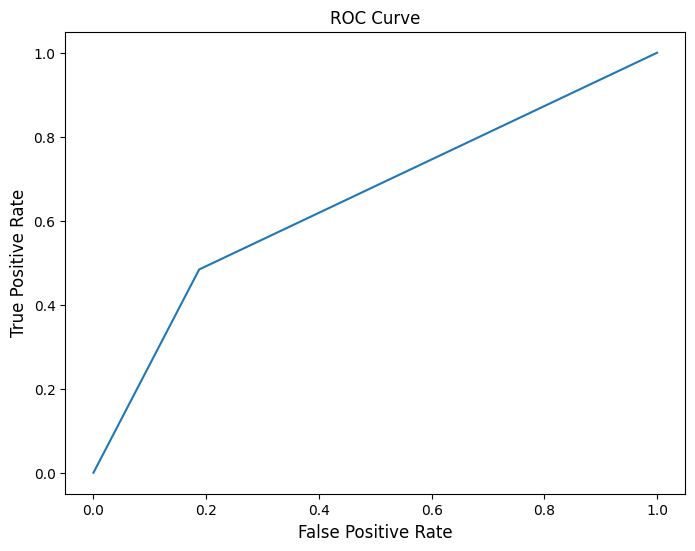

In [69]:
y_pred = model.predict(scaled_x_test)
y_pred=(y_pred>0.5).astype(int)
print(confusion_matrix(y_pred,y_test))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Deep Learning Accuracy Score: ",accuracy)
print("Deep Learning Precision Score: ",precision)
print("Deep Learning Recall Score: ",recall)

print("f1 score : ", f1_score(y_test, y_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

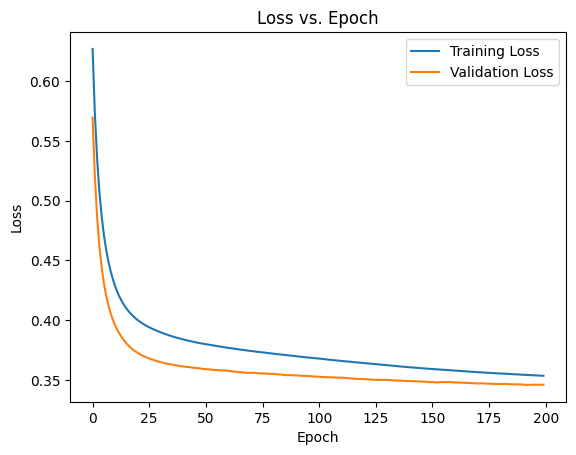

In [70]:
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

### Model 2

In [71]:

model_1 = Sequential()
model_1.add(Dense(14, input_shape=(14,),activation = 'leaky_relu'))
# model_1.add(Dense(8,activation = 'leaky_relu'))
# model_1.add(Dense(6,activation = 'leaky_relu'))
model_1.add(Dense(1, activation='sigmoid'))


# Compile the model and calculate its accuracy:
model_1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Print a summary of the Keras model:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 14)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 15        
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


32/32 [==============================] - 0s 2ms/step
[[786  39]
 [174  23]]
Deep Learning Accuracy Score:  0.7915851272015656
Deep Learning Precision Score:  0.116751269035533
Deep Learning Recall Score:  0.3709677419354839
f1 score :  0.1776061776061776
AUC value is: 0.5948588709677419


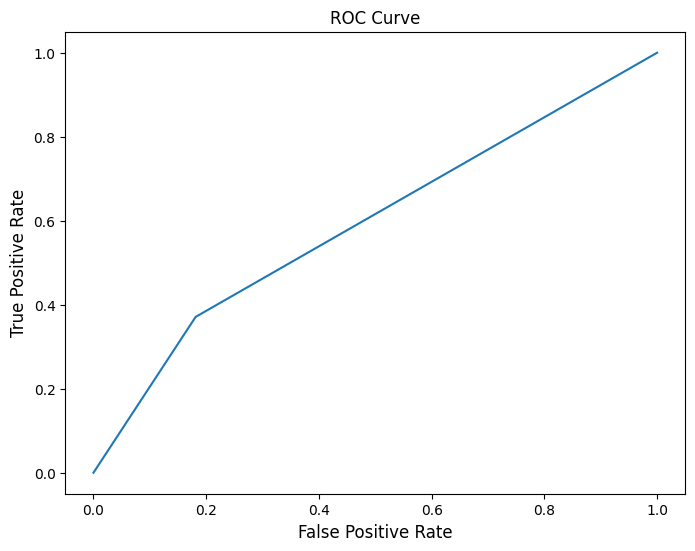

In [73]:
history_1 = model_1.fit(x=x_train,y=y_train,validation_data=(x_validation,y_validation),batch_size = 32, epochs=50, verbose=0)

y_pred = model_1.predict(scaled_x_test)
y_pred=(y_pred>0.5).astype(int)
print(confusion_matrix(y_pred,y_test))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Deep Learning Accuracy Score: ",accuracy)
print("Deep Learning Precision Score: ",precision)
print("Deep Learning Recall Score: ",recall)

print("f1 score : ", f1_score(y_test, y_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

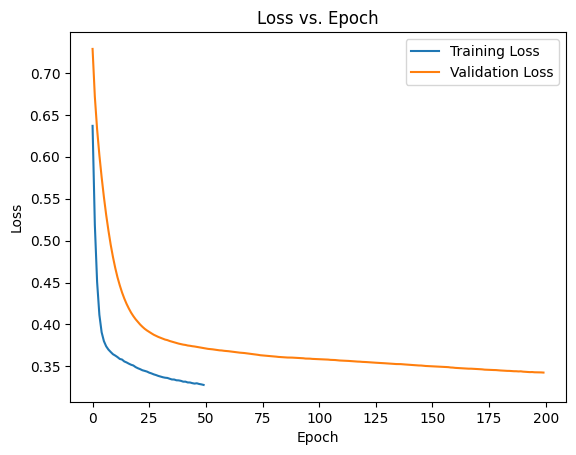

In [ ]:
plt.plot(history_1.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

### Model 3

In [ ]:
model_2 = Sequential()
model_2.add(Dense(14, input_shape=(14,),activation = 'relu'))
model_2.add(Dense(12,activation = 'leaky_relu'))
model_2.add(Dense(6,activation = 'leaky_relu'))
model_2.add(Dense(1, activation='sigmoid'))


# Compile the model and calculate its accuracy:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the Keras model:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 14)                210       
                                                                 
 dense_7 (Dense)             (None, 12)                180       
                                                                 
 dense_8 (Dense)             (None, 6)                 78        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 475 (1.86 KB)
Trainable params: 475 (1.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 61: early stopping
32/32 [==============================] - 0s 1ms/step
[[805  38]
 [155  24]]
Deep Learning Accuracy Score:  0.8111545988258317
Deep Learning Precision Score:  0.1340782122905028
Deep Learning Recall Score:  0.3870967741935484
f1 score :  0.1991701244813278
AUC value is: 0.7868111559139785


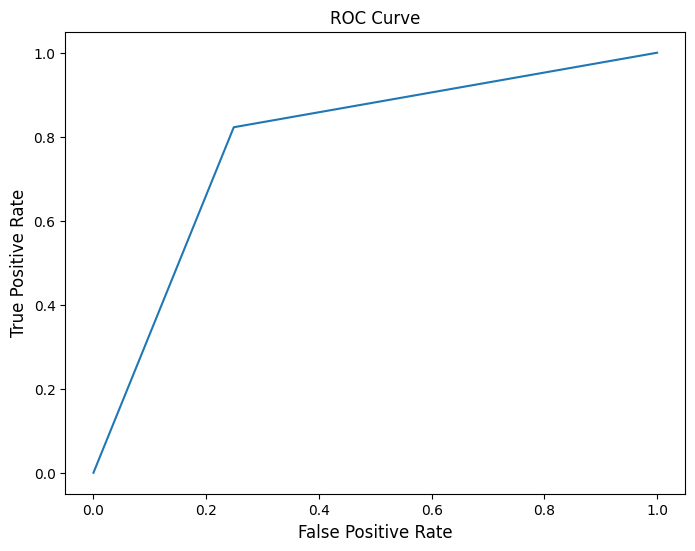

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history_3 = model_2.fit(x=x_train,y=y_train,validation_data=(x_validation,y_validation),batch_size = 32, epochs=100, verbose=0,  callbacks=[es])

y_pred = model_2.predict(scaled_x_test)
y_pred=(y_pred>0.5).astype(int)
print(confusion_matrix(y_pred,y_test))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Deep Learning Accuracy Score: ",accuracy)
print("Deep Learning Precision Score: ",precision)
print("Deep Learning Recall Score: ",recall)

print("f1 score : ", f1_score(y_test, y_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_boost)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

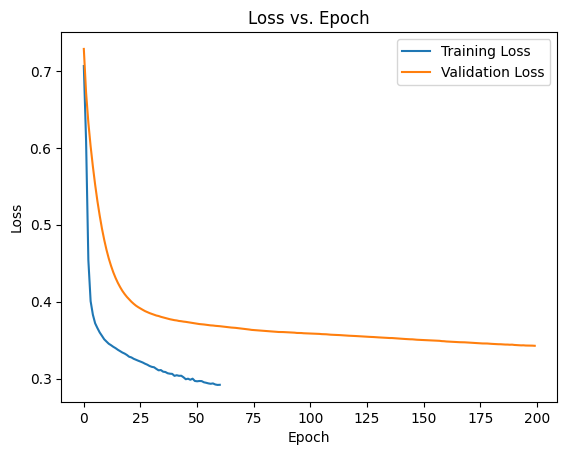

In [ ]:
plt.plot(history_3.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

## Grid search

In [ ]:
# Define a function to create the Keras model
def create_model(optimizer='sgd'):
    model = Sequential()
    model.add(Dense(12, input_shape=(14,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier based on your model function
model = KerasClassifier(build_fn=create_model)

# Define the grid search parameters
param_grid = {
    'batch_size': [32,64],
    'epochs': [50, 100,200],
    'optimizer': ['sgd', 'adam']
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the grid search using your data
grid_result = grid.fit(scaled_x_train, y_train_resampled)

# Print the best parameters and accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


## MLP Classifier

### Model 1

In [ ]:

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(128), max_iter=100,activation = 'relu',solver='adam',random_state=42, early_stopping= True,
                           verbose=True, validation_fraction=0.1, n_iter_no_change=10, tol=1e-4)




In [ ]:
#Fitting the training data to the network
cls = classifier.fit(x_train, y_train)

#Predicting y for X_val
y_pred = cls.predict(scaled_x_test)


Iteration 1, loss = 0.61582272
Validation score: 0.739326
Iteration 2, loss = 0.53480496
Validation score: 0.791011
Iteration 3, loss = 0.48576627
Validation score: 0.820225
Iteration 4, loss = 0.45338538
Validation score: 0.831461
Iteration 5, loss = 0.42836171
Validation score: 0.829213
Iteration 6, loss = 0.40905997
Validation score: 0.829213
Iteration 7, loss = 0.39572380
Validation score: 0.838202
Iteration 8, loss = 0.38803230
Validation score: 0.847191
Iteration 9, loss = 0.38162040
Validation score: 0.844944
Iteration 10, loss = 0.37365565
Validation score: 0.842697
Iteration 11, loss = 0.36852958
Validation score: 0.844944
Iteration 12, loss = 0.36572177
Validation score: 0.851685
Iteration 13, loss = 0.36302429
Validation score: 0.847191
Iteration 14, loss = 0.35949179
Validation score: 0.847191
Iteration 15, loss = 0.35679146
Validation score: 0.849438
Iteration 16, loss = 0.35776347
Validation score: 0.851685
Iteration 17, loss = 0.35637936
Validation score: 0.847191
Iterat

In [ ]:
cm = confusion_matrix(y_pred, y_test)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')

class_report = classification_report(y_pred, y_test)
print('Classification Report:')
print(class_report)

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:')
print(cm)

Accuracy: 0.7945205479452054
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       826
           1       0.39      0.12      0.19       196

    accuracy                           0.79      1022
   macro avg       0.60      0.54      0.53      1022
weighted avg       0.74      0.79      0.75      1022

Confusion Matrix:
[[788  38]
 [172  24]]


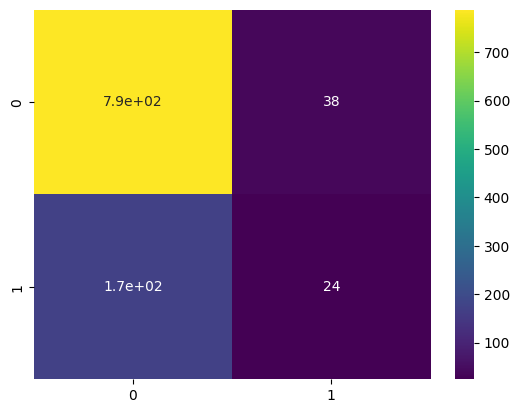

In [ ]:
sns.heatmap(cm,cmap='viridis',annot=True);

f1 score :  0.18604651162790695
AUC value is: 0.7868111559139785


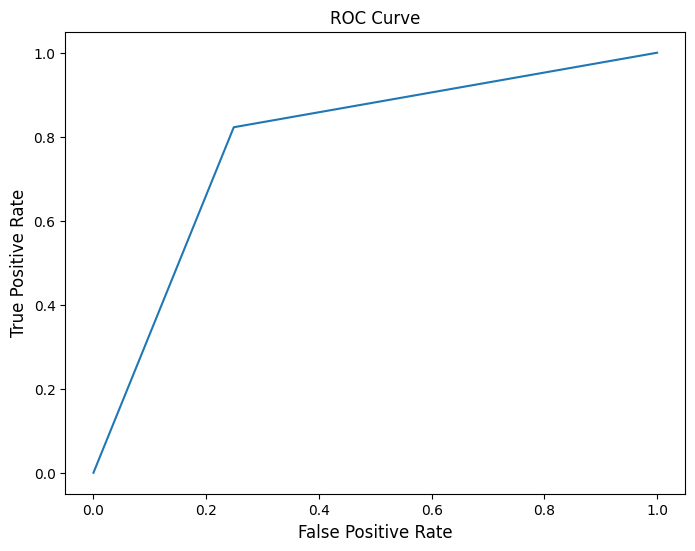

In [ ]:
print("f1 score : ", f1_score(y_test, y_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_boost)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

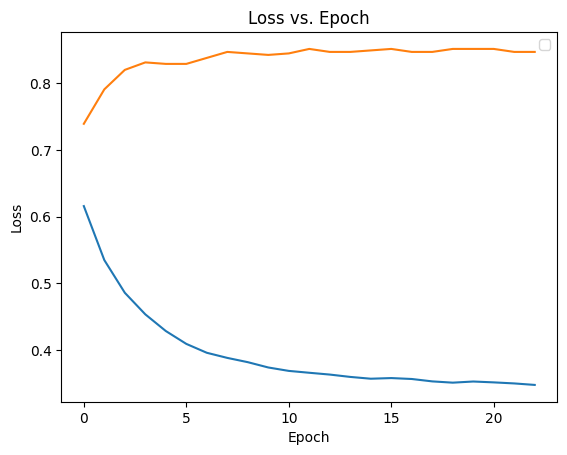

In [ ]:
plt.plot(classifier.loss_curve_)
plt.plot(classifier.validation_scores_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

### Model 2

Accuracy: 0.8033268101761253
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       843
           1       0.32      0.11      0.17       179

    accuracy                           0.80      1022
   macro avg       0.58      0.53      0.53      1022
weighted avg       0.74      0.80      0.76      1022

Confusion Matrix:
[[801  42]
 [159  20]]
f1 score :  0.16597510373443983
AUC value is: 0.7868111559139785


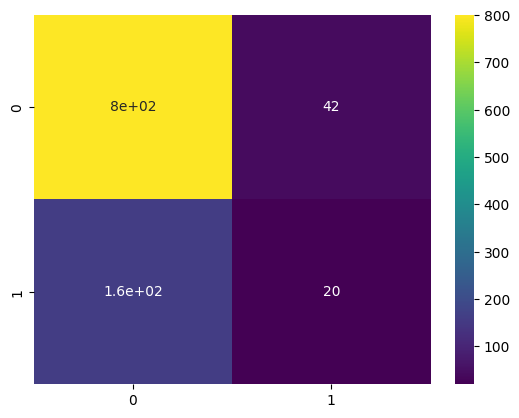

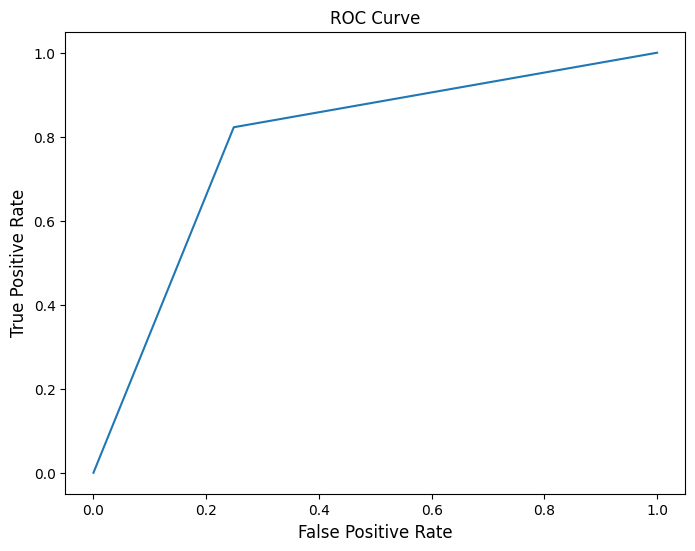

In [ ]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(64), max_iter=100,activation = 'relu',solver='adam',random_state=42, early_stopping= True,
                           verbose=False, validation_fraction=0.1, n_iter_no_change=10, tol=1e-4)

cls = classifier.fit(x_train, y_train)
y_pred = cls.predict(scaled_x_test)

cm = confusion_matrix(y_pred, y_test)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')

class_report = classification_report(y_pred, y_test)
print('Classification Report:')
print(class_report)

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:')
print(cm)

sns.heatmap(cm,cmap='viridis',annot=True);

print("f1 score : ", f1_score(y_test, y_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_boost)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

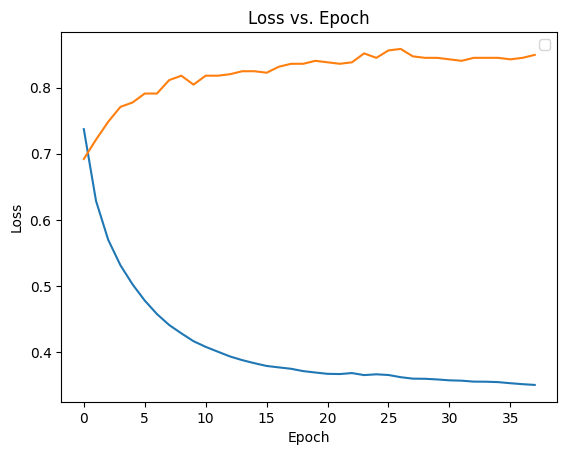

In [ ]:
plt.plot(classifier.loss_curve_)
plt.plot(classifier.validation_scores_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

### Model 3

Iteration 1, loss = 0.74710084
Validation score: 0.660674
Iteration 2, loss = 0.65793673
Validation score: 0.710112
Iteration 3, loss = 0.60128371
Validation score: 0.743820
Iteration 4, loss = 0.56552980
Validation score: 0.770787
Iteration 5, loss = 0.53838008
Validation score: 0.797753
Iteration 6, loss = 0.51602893
Validation score: 0.813483
Iteration 7, loss = 0.49689416
Validation score: 0.817978
Iteration 8, loss = 0.48100413
Validation score: 0.826966
Iteration 9, loss = 0.46777570
Validation score: 0.835955
Iteration 10, loss = 0.45630253
Validation score: 0.840449
Iteration 11, loss = 0.44871832
Validation score: 0.847191
Iteration 12, loss = 0.44552334
Validation score: 0.847191
Iteration 13, loss = 0.43685056
Validation score: 0.849438
Iteration 14, loss = 0.43054418
Validation score: 0.849438
Iteration 15, loss = 0.42454422
Validation score: 0.847191
Iteration 16, loss = 0.41826539
Validation score: 0.849438
Iteration 17, loss = 0.41268163
Validation score: 0.851685
Iterat

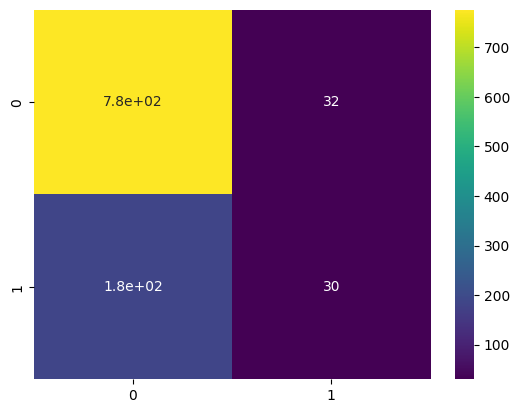

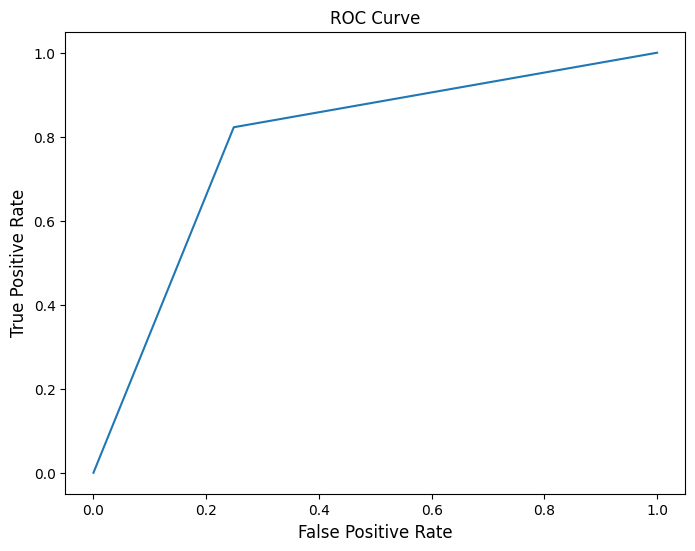

In [ ]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(14,8), max_iter=100,activation = 'relu',solver='adam',random_state=42, early_stopping= True,
                           verbose=True, validation_fraction=0.1, n_iter_no_change=15, tol=1e-4)

#Fitting the training data to the network
cls = classifier.fit(x_train, y_train)

#Predicting y for X_val
y_pred = cls.predict(scaled_x_test)

cm = confusion_matrix(y_pred, y_test)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')

class_report = classification_report(y_pred, y_test)
print('Classification Report:')
print(class_report)

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:')
print(cm)

sns.heatmap(cm,cmap='viridis',annot=True);

print("f1 score : ", f1_score(y_test, y_pred))

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_boost)
plt.figure(figsize = (8, 6))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("ROC Curve", size = 12)
auc_value = auc(false_positive_rate, true_positive_rate)
print("AUC value is:", auc_value)

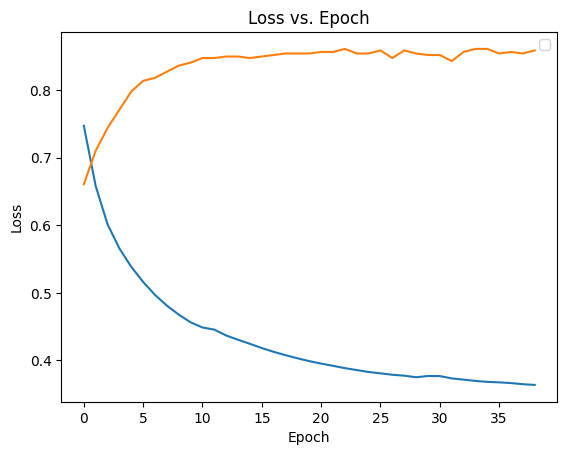

In [ ]:
plt.plot(classifier.loss_curve_)
plt.plot(classifier.validation_scores_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

## MLP -3

Accuracy: 0.8444227005870841
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       921
           1       0.03      0.02      0.02       101

    accuracy                           0.84      1022
   macro avg       0.46      0.48      0.47      1022
weighted avg       0.81      0.84      0.83      1022

Confusion Matrix:
[[861  60]
 [ 99   2]]


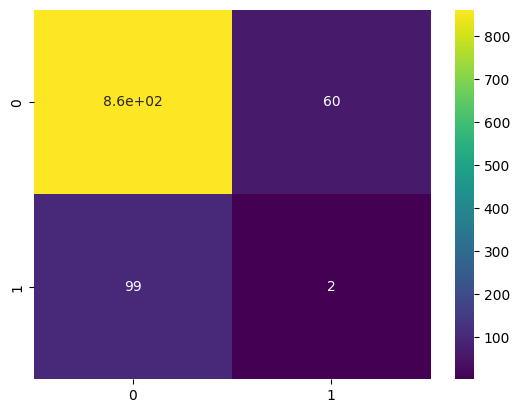

In [ ]:
#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(4), max_iter=100,activation = 'relu',solver='adam',random_state=42, early_stopping= True,
                           verbose=False, validation_fraction=0.1, n_iter_no_change=15, tol=1e-4)

#Fitting the training data to the network
cls = classifier.fit(x_train, y_train)

#Predicting y for X_val
y_pred = cls.predict(scaled_x_test)

cm = confusion_matrix(y_pred, y_test)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')

class_report = classification_report(y_pred, y_test)
print('Classification Report:')
print(class_report)

cm = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:')
print(cm)

sns.heatmap(cm,cmap='viridis',annot=True);

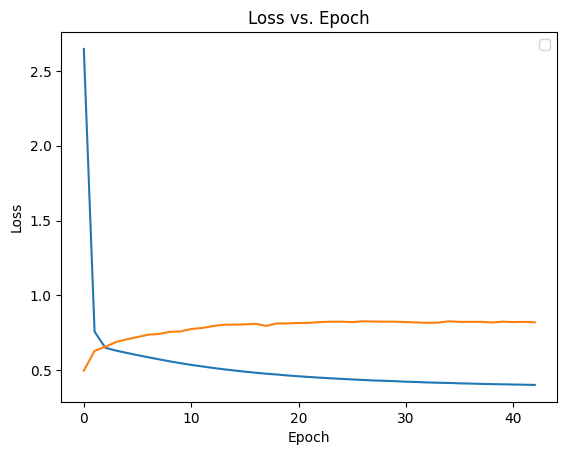

In [ ]:
plt.plot(classifier.loss_curve_)
plt.plot(classifier.validation_scores_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()

## grid search for MLP

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,),(10,8,4), (32, 12),(24,16,8)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd','lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1]

}


In [ ]:
mlp = MLPClassifier(random_state=42, max_iter=200, validation_fraction=0.1, early_stopping=True)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

In [ ]:
grid_search.fit(scaled_x_train, y_train_resampled)

GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (10, 8, 4),
                                                (32, 12), (24, 16, 8)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['adam', 'sgd', 'lbfgs']},
             scoring='roc_auc')

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [ ]:
from sklearn.metrics import roc_auc_score
y_predicted = best_model.predict_proba(scaled_x_test)[:, 1]
test_auc = roc_auc_score(y_test, y_predicted)
print("Best Parameters:", best_params)
print("Test AUC:", test_auc)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Test AUC: 0.7490255376344086


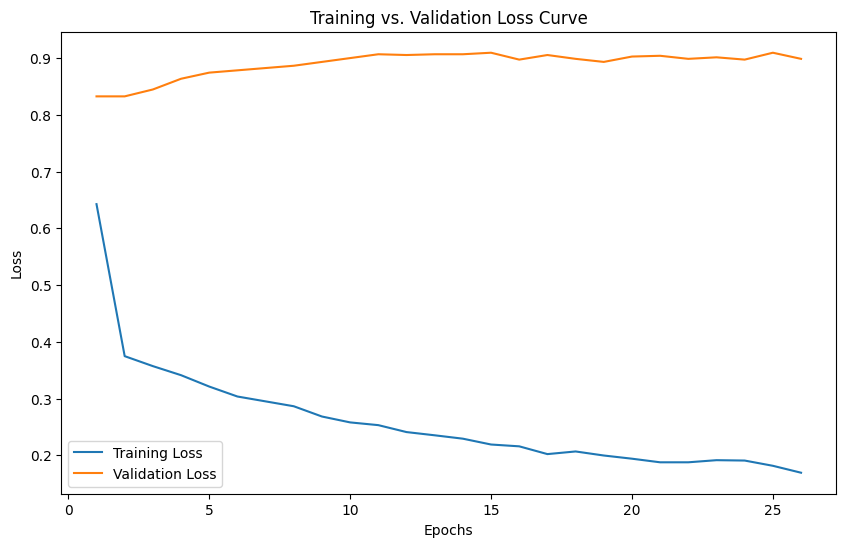

In [ ]:
training_loss = best_model.loss_curve_
validation_loss = best_model.validation_scores_

# Plot the training vs. validation loss curve
epochs = range(1, len(training_loss) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss Curve')
plt.legend()
plt.show()

Accuracy: 0.8317025440313112
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       878
           1       0.27      0.12      0.17       144

    accuracy                           0.83      1022
   macro avg       0.57      0.53      0.54      1022
weighted avg       0.78      0.83      0.80      1022

Confusion Matrix:
[[833  45]
 [127  17]]


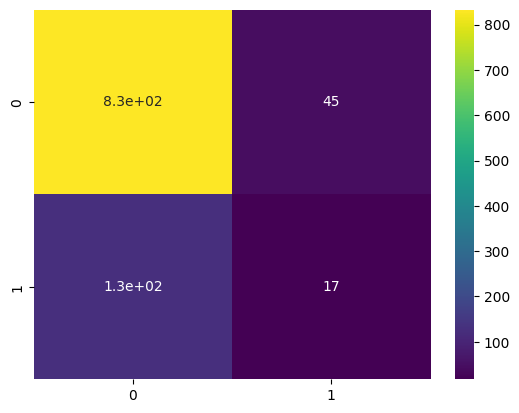

In [ ]:
y_pred_1 = best_model.predict(scaled_x_test)
cm = confusion_matrix(y_pred_1, y_test)

accuracy = accuracy_score(y_pred_1, y_test)
print(f'Accuracy: {accuracy}')

class_report = classification_report(y_pred_1, y_test)
print('Classification Report:')
print(class_report)

cm = confusion_matrix(y_pred_1, y_test)
print('Confusion Matrix:')
print(cm)

sns.heatmap(cm,cmap='viridis',annot=True);